# What matters the most when you buy a house? Location, location, location!

#### That a very popular statement nowadays and I am a believer of it. Because it's true, no matter in which country all over the world. 

#### Based on our life experience, house price would be strongly related to below factors:
1. Which city? A well-developed and modern city must be more attractive than others
2. Which area in the city? House in CBD, or city center must have higher price than surburb area
3. Within the same area? There might be other factors fluctuate the sales price, like transpotaion, convenience, education, etc. Those factors normally just slighly increase or decrease the price, compared to the average price of this area. But those factors would not be that crucial, to overtune the price in countryside to higher than an apartment in downtown.

#### From checking below column description
* ADDRESS + LONGITUDE + LATITUDE might help identify location?
* Other columns might be the factors that bring the price higher or lower than the average?

|Column | Description |
| --- | --- |
| POSTED_BY          | Category marking who has listed the property |
| UNDER_CONSTRUCTION | Under Construction or Not|
| RERA	             | Rera approved or Not|
| BHK_NO	         | Number of Rooms|
| BHK_OR_RK	         | Type of property|
| SQUARE_FT	         | Total area of the house in square feet|
| READY_TO_MOVE	     | Category marking Ready to move or Not|
| RESALE 	         | Category marking Resale or not|
| ADDRESS	         | Address of the property|
| LONGITUDE 	     | Longitude of the property|
| LATITUDE  	     | Latitude of the property|




 ### So above are my initial thinking when firstly glance on the data. Let's do a quick EDA and see if they are applicable in this dataset.

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
import datetime as dt
warnings.filterwarnings('ignore')
pd.options.display.max_rows = None
pd.options.display.max_columns = None
train_file = '/kaggle/input/house-price-prediction-challenge/train.csv'
train_df = pd.read_csv(train_file)

/kaggle/input/house-price-prediction-challenge/sample_submission.csv
/kaggle/input/house-price-prediction-challenge/train.csv
/kaggle/input/house-price-prediction-challenge/test.csv


#### Checkout the datatype and cleanliness
* Datatype
* Description
* Null value ratio

In [54]:
train_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [55]:
train_df.info()
# Data has no null value, pretty clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [56]:
train_df.describe(include='all')
# On BHK_OR_RK field, there are 29427 BHKs out of 29451, might not be useful in our models

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451,29451.000000,29451.000000,29451.000000,29451,2.945100e+04,29451.000000,29451.000000,29451,29451.000000,29451.000000,29451.000000
unique,3,NaN,NaN,NaN,2,NaN,NaN,NaN,6899,NaN,NaN,NaN
top,Dealer,NaN,NaN,NaN,BHK,NaN,NaN,NaN,"Zirakpur,Chandigarh",NaN,NaN,NaN
freq,18291,NaN,NaN,NaN,29427,NaN,NaN,NaN,509,NaN,NaN,NaN
mean,NaN,0.179756,0.317918,2.392279,NaN,1.980217e+04,0.820244,0.929578,NaN,21.300255,76.837695,142.898746
std,NaN,0.383991,0.465675,0.879091,NaN,1.901335e+06,0.383991,0.255861,NaN,6.205306,10.557747,656.880713
min,NaN,0.000000,0.000000,1.000000,NaN,3.000000e+00,0.000000,0.000000,NaN,-37.713008,-121.761248,0.250000
25%,NaN,0.000000,0.000000,2.000000,NaN,9.000211e+02,1.000000,1.000000,NaN,18.452663,73.798100,38.000000
50%,NaN,0.000000,0.000000,2.000000,NaN,1.175057e+03,1.000000,1.000000,NaN,20.750000,77.324137,62.000000
75%,NaN,0.000000,1.000000,3.000000,NaN,1.550688e+03,1.000000,1.000000,NaN,26.900926,77.828740,100.000000


## Checkout distribution of target column and what might be most related to it.
Size (SQUARE_FT) should be strongly correlated

Text(0.5, 1.0, 'SQUARE_FT vs TARGET(PRICE_IN_LACS) without outlier')

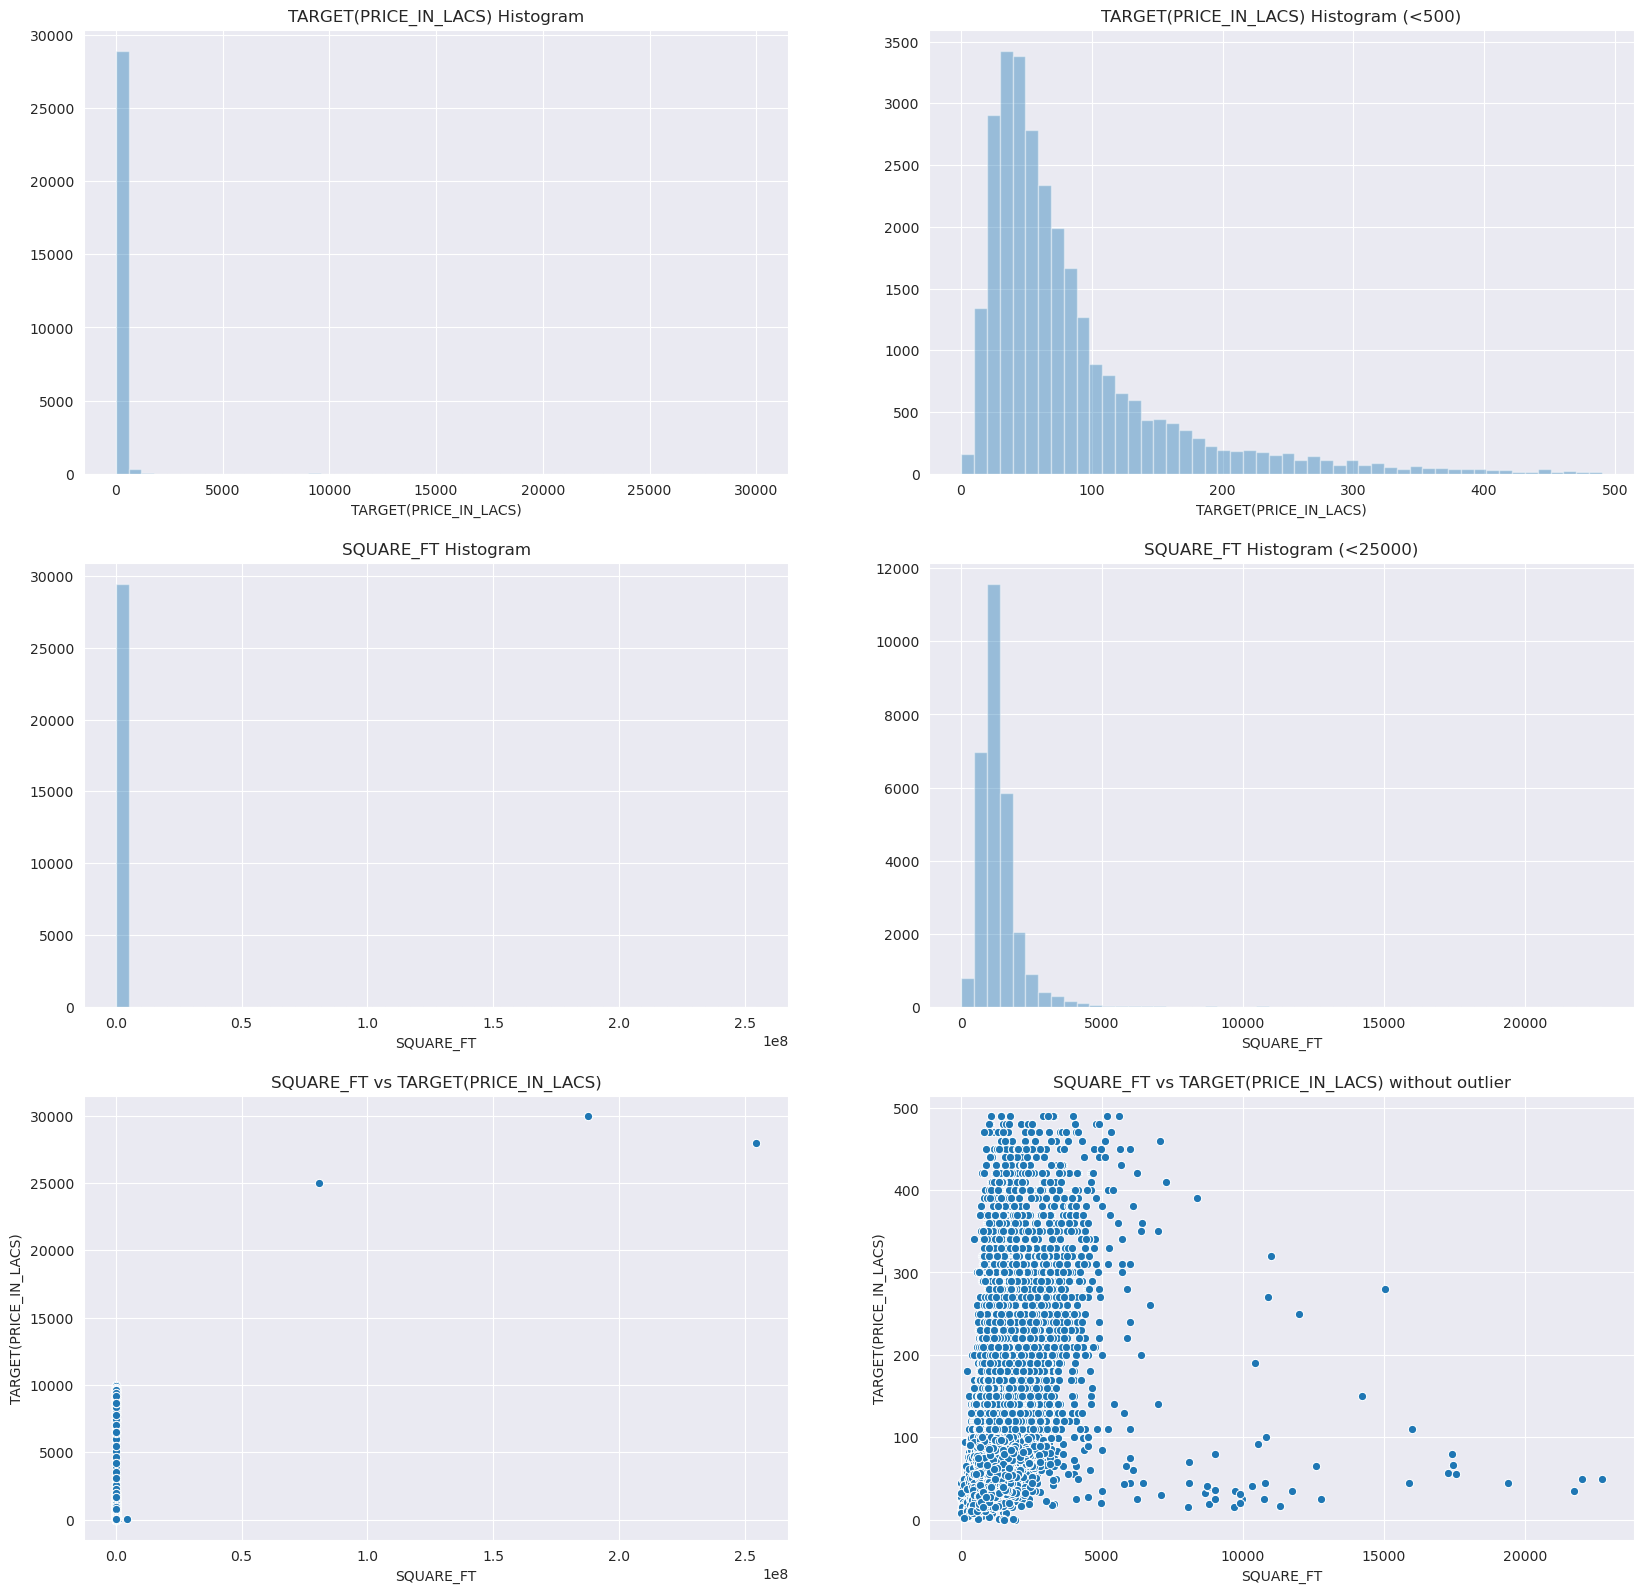

In [57]:
fig,ax = plt.subplots(ncols=2,nrows=3,dpi=100,figsize=(20,20))
sns.distplot(a=train_df['TARGET(PRICE_IN_LACS)'], kde=False, ax=ax[0][0])
df1 = train_df[train_df['TARGET(PRICE_IN_LACS)']<500]
sns.distplot(a=df1['TARGET(PRICE_IN_LACS)'], kde=False, ax=ax[0][1])


sns.distplot(a=train_df['SQUARE_FT'], kde=False, ax=ax[1][0])
df1 = train_df[train_df['SQUARE_FT'] < 25000]
sns.distplot(a=df1['SQUARE_FT'], kde=False, ax=ax[1][1])


sns.scatterplot(x=train_df['SQUARE_FT'], y=train_df['TARGET(PRICE_IN_LACS)'], ax=ax[2][0])
df1 = train_df[(train_df['TARGET(PRICE_IN_LACS)']<500) & (train_df['SQUARE_FT'] < 25000)]
sns.scatterplot(x=df1['SQUARE_FT'], y=df1['TARGET(PRICE_IN_LACS)'], ax=ax[2][1])

ax[0][0].set_title('TARGET(PRICE_IN_LACS) Histogram')
ax[0][1].set_title('TARGET(PRICE_IN_LACS) Histogram (<500)')

ax[1][0].set_title('SQUARE_FT Histogram')
ax[1][1].set_title('SQUARE_FT Histogram (<25000)')

ax[2][0].set_title('SQUARE_FT vs TARGET(PRICE_IN_LACS)')
ax[2][1].set_title('SQUARE_FT vs TARGET(PRICE_IN_LACS) without outlier')
# ax[1].set_title('AC power & DC power during day hours')

### We can see the SQUARE_FT is somehow correlated to target price. There are a lot of outliers with very low price/SQF. We need to keep explore other fields and see if we can find out something useful to address them.

#### For categorical fields, we can see all the distinct values

In [58]:
for x in train_df.columns:
    if train_df[x].dtype != 'float64':        
        print(x, train_df[x].unique())
        print('-'*10)


POSTED_BY ['Owner' 'Dealer' 'Builder']
----------
UNDER_CONSTRUCTION [0 1]
----------
RERA [0 1]
----------
BHK_NO. [ 2  3  1  4  5  6 12  8 20 10  7  9 13 17 15 11]
----------
BHK_OR_RK ['BHK' 'RK']
----------
READY_TO_MOVE [1 0]
----------
RESALE [1 0]
----------
ADDRESS ['Ksfc Layout,Bangalore' 'Vishweshwara Nagar,Mysore' 'Jigani,Bangalore'
 ... 'west mambalam,Chennai' 'Gandhi Nagar,Gulbarga'
 'E3-108, Lake View Recidency,,Vapi']
----------


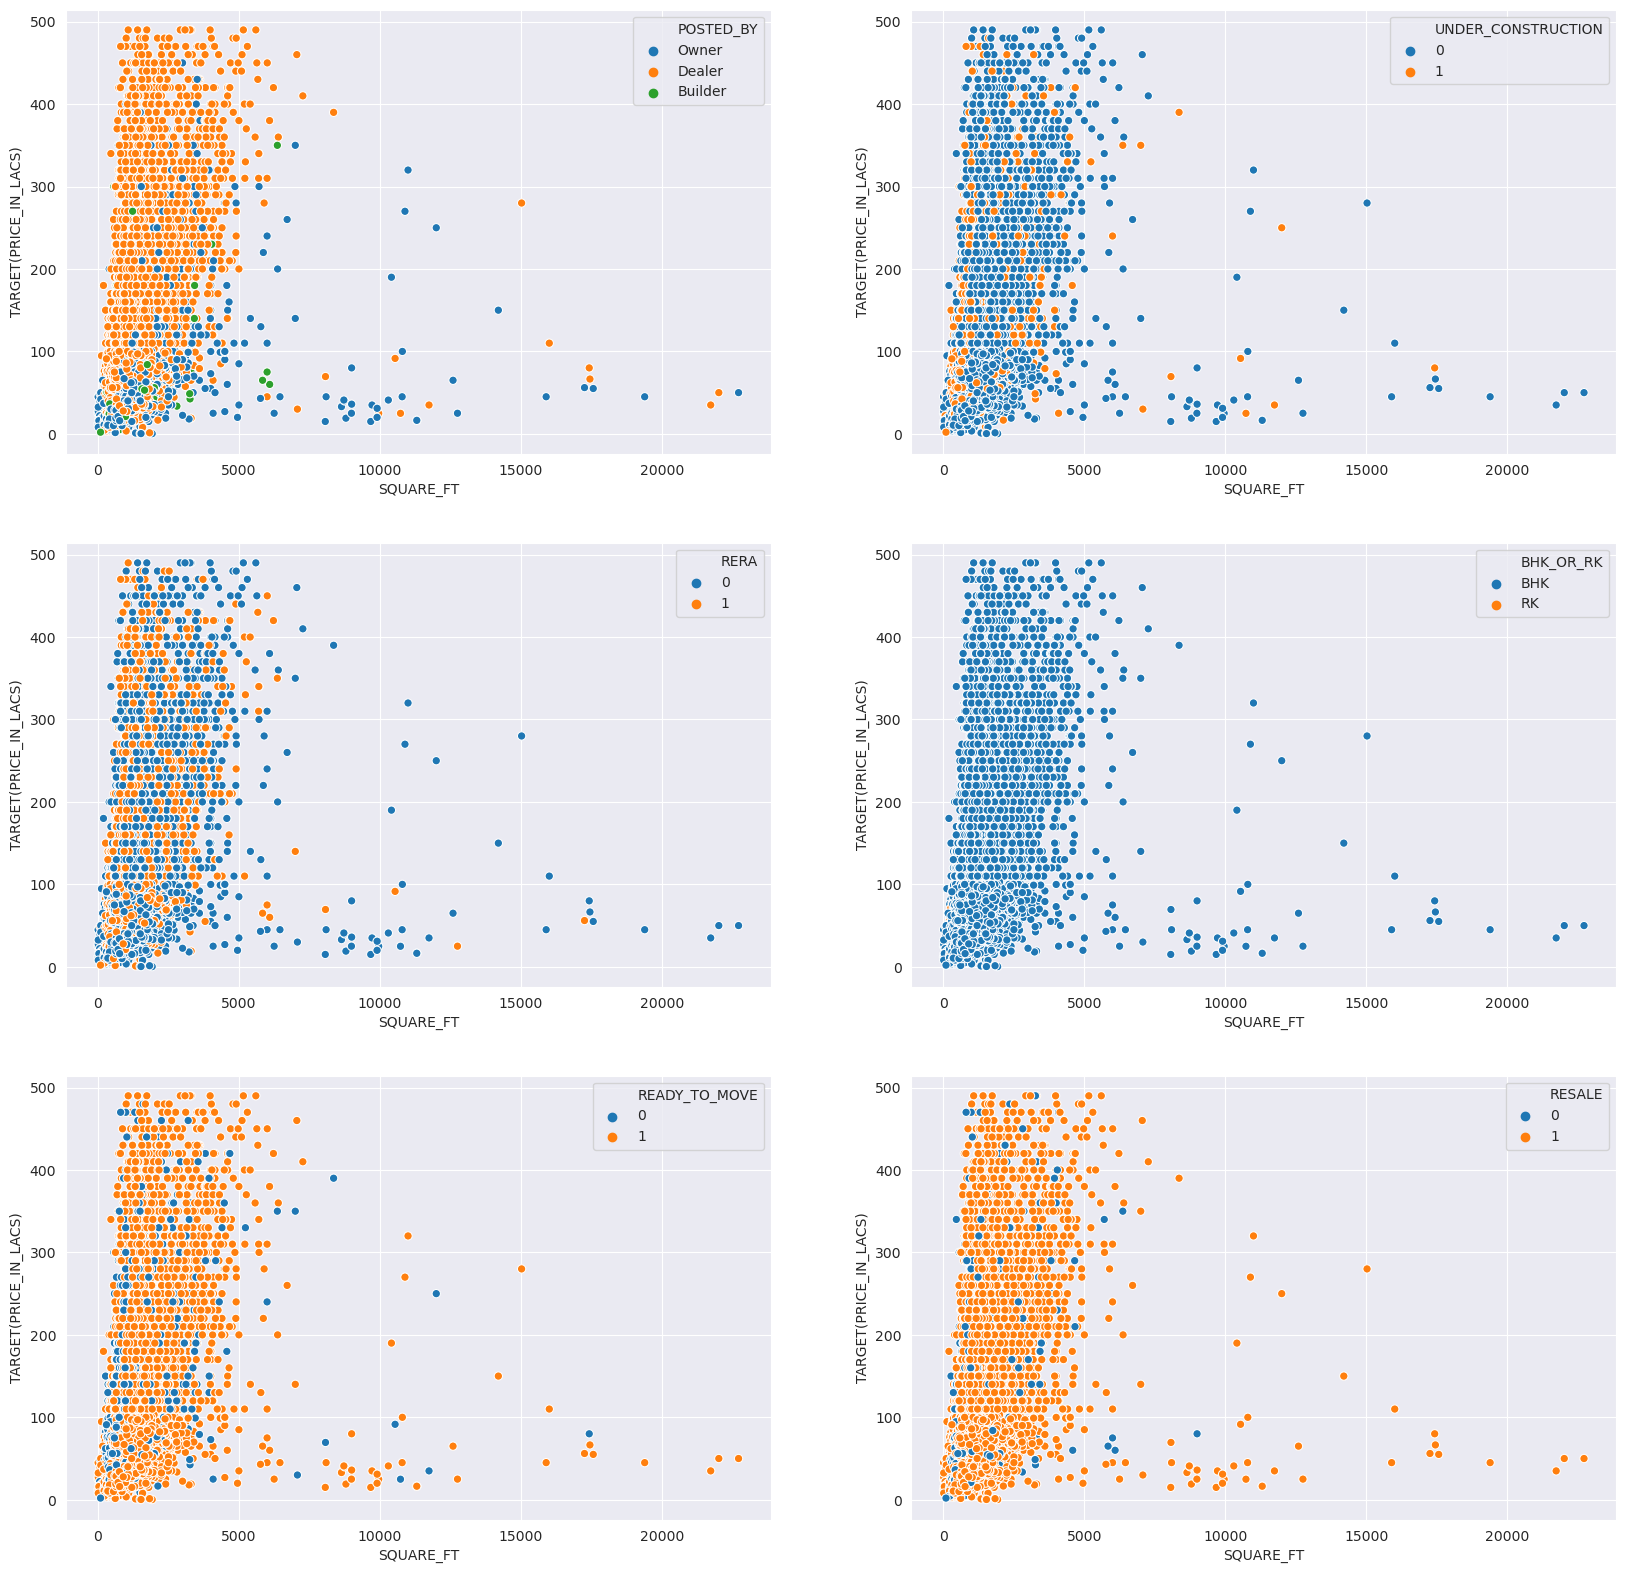

In [59]:
fig,ax = plt.subplots(ncols=2,nrows=3,dpi=100,figsize=(20,20))
df1 = train_df[(train_df['TARGET(PRICE_IN_LACS)']<500) & (train_df['SQUARE_FT'] < 25000)]
sns.scatterplot(x=df1['SQUARE_FT'], y=df1['TARGET(PRICE_IN_LACS)'], hue=df1['POSTED_BY'], ax=ax[0][0])
sns.scatterplot(x=df1['SQUARE_FT'], y=df1['TARGET(PRICE_IN_LACS)'], hue=df1['UNDER_CONSTRUCTION'], ax=ax[0][1])
sns.scatterplot(x=df1['SQUARE_FT'], y=df1['TARGET(PRICE_IN_LACS)'], hue=df1['RERA'], ax=ax[1][0])
sns.scatterplot(x=df1['SQUARE_FT'], y=df1['TARGET(PRICE_IN_LACS)'], hue=df1['BHK_OR_RK'], ax=ax[1][1])
sns.scatterplot(x=df1['SQUARE_FT'], y=df1['TARGET(PRICE_IN_LACS)'], hue=df1['READY_TO_MOVE'], ax=ax[2][0])
sns.scatterplot(x=df1['SQUARE_FT'], y=df1['TARGET(PRICE_IN_LACS)'], hue=df1['RESALE'], ax=ax[2][1])


## Check correlation heatmap between those features

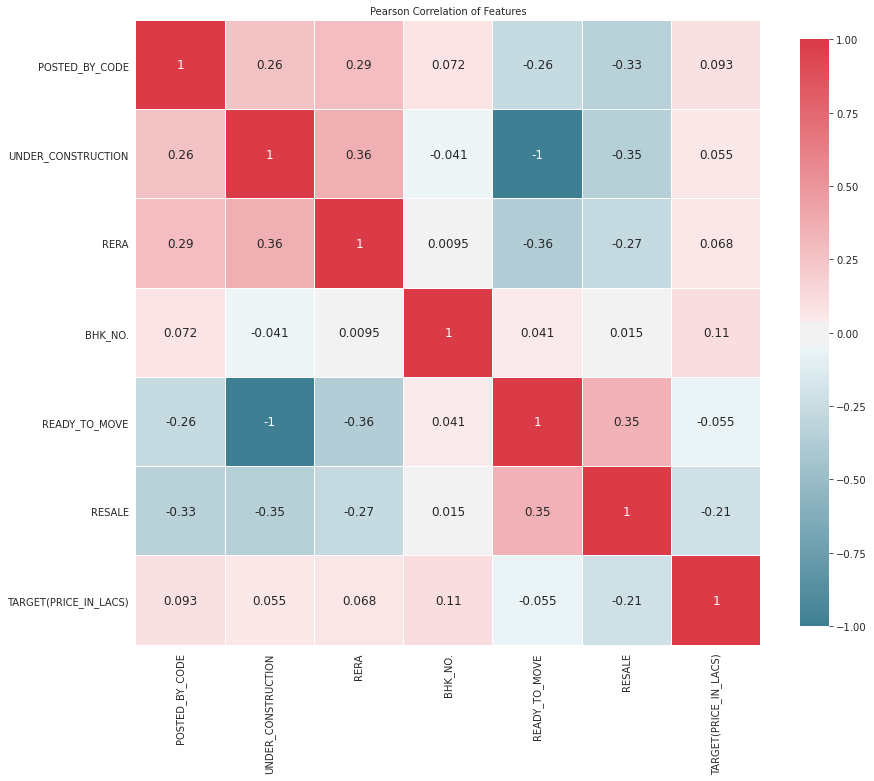

In [60]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=10)

## Map poster and bhk ind to integer
posted_by_map = {'Owner':1, 'Dealer':2, 'Builder':3}
train_df['POSTED_BY_CODE'] = train_df['POSTED_BY'].map(posted_by_map)

candidates_col = ['POSTED_BY_CODE', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'READY_TO_MOVE', 'RESALE','TARGET(PRICE_IN_LACS)']
correlation_heatmap(train_df[candidates_col])

### From above diagrams, we can draw these conclusion
1. those fields are having very limit effect to the price, if we were only to put those into the model, don't think that's gonna work.
2. except POSTED_BY, we can see house price POSTED_BY owner is slighly lower than others
3. UNDER_CONSTRUCTION & READY_TO_MOVE are exactly the same field, with corr == -1. We can just keep one of them during model train

### This is more convincing for me that I need extra location-related features

### Let's label those categorical fields first then further explore on below features
* BHK_NO.
* ADDRESS
* LONGITUDE/LATITUDE

In [61]:
## Generate a unit price feature for each hosue
train_df['Price/SQF'] = train_df['TARGET(PRICE_IN_LACS)']/train_df['SQUARE_FT'] * 1000


## Explore BHK_OR_RK
#### BHK_OR_RK has too imbalance distribution, we won't use this in the model training

In [62]:
## Checkout how price/SQF related to BHK_NO.
train_df[['BHK_OR_RK','Price/SQF']].groupby('BHK_OR_RK', as_index=False).agg({'Price/SQF':['mean','count']})

BHK_OR_RK   Price/SQF       
                   mean  count
0       BHK   74.996380  29427
1        RK  127.766667     24

## Explore BHK_NO.

In [63]:
## Checkout how price/SQF related to BHK_NO.
train_df[['BHK_NO.','Price/SQF']].groupby('BHK_NO.', as_index=False).agg({'Price/SQF':['mean','count']})

BHK_NO.   Price/SQF       
                  mean  count
0        1   77.916869   3574
1        2   69.617718  13324
2        3   73.467873  10546
3        4  108.963958   1723
4        5  137.373000    190
5        6  201.541154     52
6        7  188.100000     11
7        8  146.995000     10
8        9   71.510000      3
9       10   87.382500      4
10      11   13.750000      1
11      12   31.186667      3
12      13   47.800000      1
13      15   61.665000      4
14      17   29.090000      1
15      20   67.860000      4

### We can see there are very limit price data for house num larger than 7, and unit price is very random when > 7. 
So Let's mark it as 2 (mode of the dataset) for those BNK_NO. > 7

In [64]:
train_df['BHK_NO.'] = train_df['BHK_NO.'].apply(lambda x: 2 if x > 7 else x)

### Explore ADDRESS / LONGITUDE / LATITUDE
* In address field, we can see the street, sometimes building or block number, and city at the end
    * e.g. Ksfc Layout,Bangalore
    *      Sector-1 Vaishali,Ghaziabad
* Based on initial assumption, city is one of the most decisive factor for price

### Looks like we can derive city from each address by splitting ',' and take the latest element. 
### So let's do it.


In [65]:
def extract_city(x):
    l = x.split(',')
    return ' '.join(l[:len(l)-1])

train_df['City'] = train_df['ADDRESS'].apply(lambda x: x.split(',')[-1])
train_df['Street'] = train_df['ADDRESS'].apply(lambda x: extract_city(x))
city_count = train_df.groupby('City', as_index=False)['Price/SQF'].count()
city_count.rename(columns={'Price/SQF':'count'},inplace=True)
print("City number of the dataset:", city_count.shape[0])

City number of the dataset: 256


In [66]:
city_count.sort_values(by='count').head()

,City,count
0,Agartala,1
154,Midnapore,1
149,Malappuram,1
146,Machilipatnam,1
141,Kurukshetra,1


In [67]:
city_count.sort_values(by='count').tail()

,City,count
172,Noida,1767
192,Pune,1991
158,Mumbai,2023
142,Lalitpur,2993
21,Bangalore,4340


### Looks like we now have the 'City', can see famous cities like Bangalore, Lalitpur, Mumbai, Pune, and etc, dominating the dataset, which is expected.

### let's verify if city would be greatly impact the unit price (Price/SQF)

In [68]:
df = train_df[['City','Price/SQF']] \
        .groupby('City', as_index=False)['Price/SQF'] \
        .mean() \
        .sort_values(by='Price/SQF', ascending=False)
df.head()

,City,Price/SQF
88,Hajipur,4000.000000
89,Haldia,1746.200000
108,Jalgaon,329.275294
53,Cuddalore,295.450000
116,Jind,212.935000


[Text(0, 0, 'Hajipur'),
 Text(0, 0, 'Haldia'),
 Text(0, 0, 'Jalgaon'),
 Text(0, 0, 'Cuddalore'),
 Text(0, 0, 'Jind'),
 Text(0, 0, 'Bhiwani'),
 Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Lalitpur'),
 Text(0, 0, 'Hathras'),
 Text(0, 0, 'Raipur'),
 Text(0, 0, 'Aligarh'),
 Text(0, 0, 'Vidisha'),
 Text(0, 0, 'Panaji'),
 Text(0, 0, 'Gurgaon'),
 Text(0, 0, 'Kurukshetra'),
 Text(0, 0, 'Pune'),
 Text(0, 0, 'Goa'),
 Text(0, 0, 'Ooty'),
 Text(0, 0, 'Bangalore')]

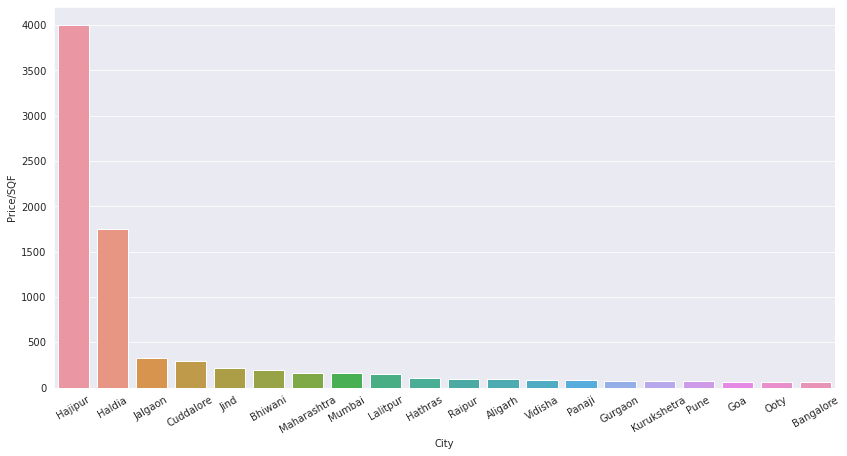

In [69]:
## Showing top 30 only, there 256 in total.
plt.figure(figsize=(14,7))
g = sns.barplot(x=df.head(20)['City'], y=df.head(20)['Price/SQF'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

### Looks like we are getting somewhere, but Hajipur, Haldia are outlier, they only have 1 row each in train_df. 

### Let's remove them and see how it goes.

[Text(0, 0, 'Jalgaon'),
 Text(0, 0, 'Cuddalore'),
 Text(0, 0, 'Jind'),
 Text(0, 0, 'Bhiwani'),
 Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Lalitpur'),
 Text(0, 0, 'Hathras'),
 Text(0, 0, 'Raipur'),
 Text(0, 0, 'Aligarh'),
 Text(0, 0, 'Vidisha'),
 Text(0, 0, 'Panaji'),
 Text(0, 0, 'Gurgaon'),
 Text(0, 0, 'Kurukshetra'),
 Text(0, 0, 'Pune'),
 Text(0, 0, 'Goa'),
 Text(0, 0, 'Ooty'),
 Text(0, 0, 'Bangalore'),
 Text(0, 0, 'Ahmednagar'),
 Text(0, 0, 'Kanpur'),
 Text(0, 0, 'Kakinada'),
 Text(0, 0, 'Srinagar'),
 Text(0, 0, 'Arrah'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'Hassan'),
 Text(0, 0, 'Agartala'),
 Text(0, 0, 'Shimla'),
 Text(0, 0, 'Salem'),
 Text(0, 0, 'Noida'),
 Text(0, 0, 'Chandigarh')]

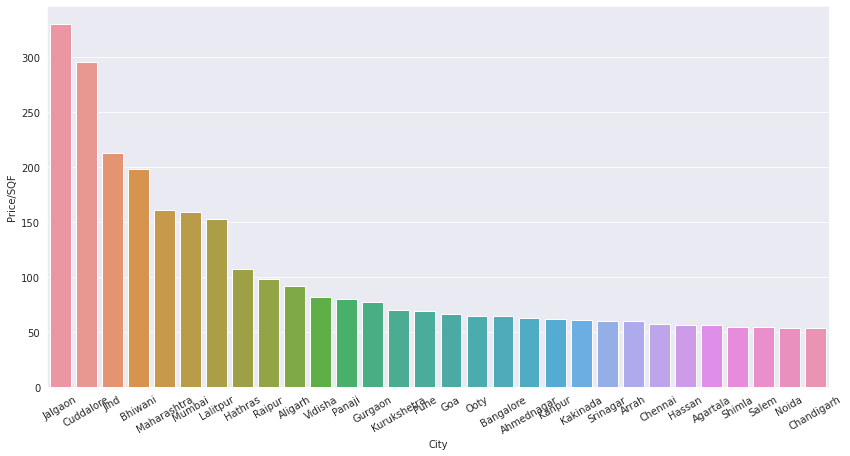

In [70]:
## Showing top 30 only, there 256 in total.
df = df[~df['City'].isin(['Hajipur','Haldia'])]
plt.figure(figsize=(14,7))
g = sns.barplot(x=df.head(30)['City'], y=df.head(30)['Price/SQF'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

### City could be a very decisive feature, so we will include it to the model. But what might differentiate price within the same city?
* Central Business District or CBD as it is usually known, is generally the central area, the most frequently used and one of the most expensive areas of a city.

## Dealing with LAT and LONG


### So let's check if LONGITUDE/LATITUDE can help with that
#### Initial thought of how to use these 2 features - 
1. Assuming CBD has the highest house price, we can rank the price for houses in each city, get the highest percentile of price and take the average long/lat value as city center long/lat (name the field C_LONG, C_LAT) 
2. Calculate the distance to (C_LONG, C_LAT), further away from CBD would lower the price
3. Calculate the average price for each city as a cursor of price, assuming when we do prediction, each city should be fluctuating from its own average price. In short, training set and prediction set should presumebly share the same average price.

### Now, let's use Mumbai for example to explore

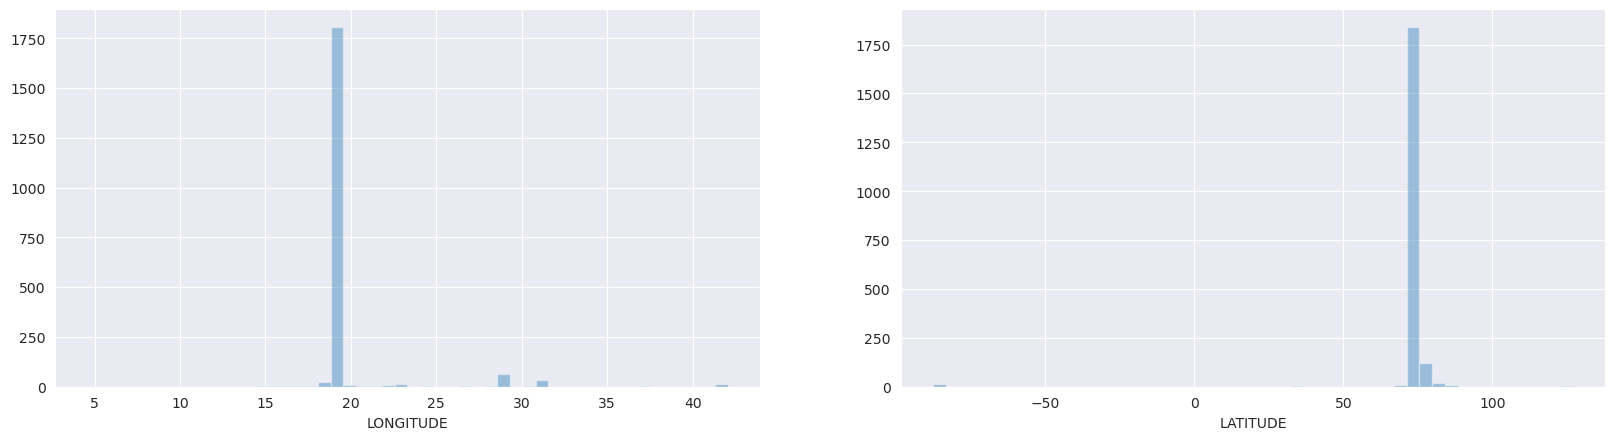

In [71]:
Mumbai_df = train_df[train_df['City']=='Mumbai'].copy()
fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
sns.distplot(a=Mumbai_df['LONGITUDE'], kde=False, ax=ax[0])
sns.distplot(a=Mumbai_df['LATITUDE'], kde=False, ax=ax[1])

### There are a some outlier
* India's longitude/latitude should be within long(6.75,35.5) and lat(68.12,97.42)
* also long/lat should not be negative

### So data quality issue here. Does that mean we can't use these feature? 

### Not yet to give up, because not all the values are wrong, maybe we can derive the approximate distanc for those.

In [72]:
def is_in_India(long, lat):
    if 6.75 < long < 35.5 and 68.12 < lat < 97.42:
        return 1
    else:
        return 0

Mumbai_df['IS_IN_INDIA'] = Mumbai_df.apply(lambda x: is_in_India(x['LONGITUDE'], x['LATITUDE']), axis=1)
print(Mumbai_df[['IS_IN_INDIA','Price/SQF']].groupby('IS_IN_INDIA',as_index=False).count())


   IS_IN_INDIA  Price/SQF
0            0         22
1            1       2001


In [73]:
city_df = train_df.copy()
city_df['IS_IN_INDIA'] = city_df.apply(lambda x: is_in_India(x['LONGITUDE'], x['LATITUDE']), axis=1)
city_df = city_df.merge(city_count, on='City')
df = city_df[['City','IS_IN_INDIA','count']].groupby(['City','count'],as_index=False).sum()
df['outlier_ratio'] = (1 - df['IS_IN_INDIA']/df['count'])*100
df.sort_values(by='outlier_ratio',ascending=False).head()

,City,count,IS_IN_INDIA,outlier_ratio
73,Gadarwara,1,0,100.000000
214,Salem,3,1,66.666667
119,Kadapa,2,1,50.000000
74,Gadhinglaj,3,2,33.333333
221,Sikar,3,2,33.333333


In [74]:
## How many cities has count < 10
(df['count'] < 10).sum()

141

### Only 1 city without any long/lat in INDIA. Think it's good enough for us to derive the C_LONG/C_LAT and calculate distance for each house, if we make below assumption
1. Big city has lots of house price data, small city would only have very few data here.
2. Small city's house price would be very close to its neighbor
3. Deriving distance based on C_LONG/C_LAT of the neighbor might get larger distance than it's reality, but don't think it would cause much impact. Assuming it's neighbor is also a small city, price in city center is still very low compared to big city. If neigher is a big city, then you get larger distance then the price has larger decline from a higher price.

### Below are the basic idea and the code I come up with after considering all different edge cases (can skip to check if it's too trivial), if the rules doesn't apply, will just remove the data from training set


1. Divide by big and small cities
2. For Big city
    - Get mode of long/lat
    - Get C_LONG/C_LAT = average LONG/LAT of house with top 1% percentile ranked by price (LONG/LAT has to be in INDIA)
    - If long/lat not correct, marked the long/lat closer to mode to be considered as in the same city
    - Calculate the distance between LONG/LAT and C_LONG/C_LAT
    - Record C_LONG/C_LAT, mean price for each big city in to a dict (later used by feature engineering for test result set)
3. For small city
    - Get mode of long/lat which is in India
    - Try to get it's neighbor city comparing with big city's C_LONG/C_LAT
    - calculate the distance and get the mean long/lat as C_LONG/C_LAT
    - Record C_LONG/C_LAT, mean price in to a dict (later used by feature engineering for test result set)
    

In [75]:
city_count = train_df.groupby('City', as_index=False)['Price/SQF'].count()
city_count.rename(columns={'Price/SQF':'count'},inplace=True)
# print('City less than 100 price', city_count[city_count['count']<10].shape[0])
# city_count = city_count[city_count['count'] > 10]
large_cities = city_count[city_count['count'] > 10]['City'].unique().tolist()
small_cities = city_count[city_count['count'] <= 10]['City'].unique().tolist()

def is_in_India(long, lat):
    if 6.75 < long < 35.5 and 68.12 < lat < 97.42:
        return 1
    else:
        return 0
    
city_df = train_df.merge(city_count, on='City', how='inner')
city_df['IS_COOR_INDIA'] = city_df.apply(lambda x: is_in_India(x['LONGITUDE'], x['LATITUDE']), axis=1)


long_lat_list = []

def fix_long_lat(l, l_mode):
    if l < l_mode - 0.3:
        return l_mode
    if l > l_mode + 0.3:
        return l_mode
    return l

def get_distance_to_center(long,lat,c_long, c_lat, is_wrong_coor):
    if is_wrong_coor==0:
        return 0.25
    else:
        return np.sqrt((long-c_long)**2 + (lat-c_lat)**2)

city_df_with_dist_list = []

for city in large_cities:
    df = city_df[(city_df['City'] == city) & (city_df['IS_COOR_INDIA'] == 1)].copy()
    long_mode = df['LONGITUDE'].mode().values[0]
    lat_mode = df['LATITUDE'].mode().values[0]
    count = df['count'].mode().values[0]
    df['LONG_MODE'] = long_mode
    df['LAT_MODE'] = lat_mode
    df['LONGITUDE'] = df.apply(lambda x: fix_long_lat(x['LONGITUDE'],x['LONG_MODE']), axis=1)
    df['LATITUDE'] = df.apply(lambda x: fix_long_lat(x['LATITUDE'],x['LAT_MODE']), axis=1)
    
    # city_suburbs.head()
    
    top_percentile = 1 if count < 10 else (10 if count < 100 else int(count * .01))
    city_center_long_lat = df.sort_values(by='Price/SQF').head(top_percentile)[['LONGITUDE','LATITUDE']].mean().values.tolist()
    city_center_long = city_center_long_lat[0]
    city_center_lat = city_center_long_lat[1]
    df['distance'] = df.apply(lambda x: get_distance_to_center(x['LONGITUDE'], x['LATITUDE'],city_center_long, city_center_lat, x['IS_COOR_INDIA']), \
                              axis=1)
    city_df_with_dist_list.append(df)
    city_mean_price = df['Price/SQF'].mean()
    long_lat_list.append([city, city_center_long, city_center_lat, city_mean_price])

long_lat_center_df = pd.DataFrame(data=long_lat_list, columns=['City','C_LONG','C_LAT', 'Price/SQF Mean'])

# long_lat_center_df
for city in small_cities:
    df = city_df[city_df['City'] == city].copy()
    if df[df['IS_COOR_INDIA']==1].shape[0] > 1:
        long_mean = df[df['IS_COOR_INDIA'] == 1]['LONGITUDE'].mean()
        lat_mean = df[df['IS_COOR_INDIA'] == 1]['LATITUDE'].mean()
        ll_df = long_lat_center_df.copy()
        ll_df['LONG_MEAN'] = long_mean
        ll_df['LAT_MEAN'] = lat_mean
        ll_df['distance'] = ll_df.apply(lambda x: get_distance_to_center(x['LONG_MEAN'], x['LAT_MEAN'], x['C_LONG'], x['C_LAT'], 1), axis=1)
        min_distance = ll_df.sort_values(by='distance')['distance'].values[0]
        df['distance'] = min_distance
        city_df_with_dist_list.append(df)
        city_center_long = df[df['IS_COOR_INDIA'] == 1]['LONGITUDE'].mean()
        city_center_lat = df[df['IS_COOR_INDIA'] == 1]['LATITUDE'].mean()
        city_mean_price = df[df['IS_COOR_INDIA'] == 1]['Price/SQF'].mean()
        long_lat_list.append([city, city_center_long, city_center_lat, city_mean_price])
    else:
        df['distance'] = 0
        city_df_with_dist_list.append(df)
        city_mean_price = df['Price/SQF'].mean()
        long_lat_list.append([city, None, None, city_mean_price])

long_lat_center_df = pd.DataFrame(data=long_lat_list, columns=['City','C_LONG','C_LAT', 'Price/SQF Mean'])
city_df_with_dist = pd.concat(city_df_with_dist_list)
city_df_with_dist.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_CODE,Price/SQF,City,Street,count,IS_COOR_INDIA,LONG_MODE,LAT_MODE,distance
23837,Dealer,0,0,4,BHK,2750.929368,1,1,"Sikandra,Agra",27.216013,77.950834,74.0,2,26.90,Agra,Sikandra,83,1,27.216013,77.950834,0.081582
23838,Owner,0,1,2,BHK,1250.000000,1,1,"Shastripuram,Agra",27.216013,77.950834,32.0,1,25.60,Agra,Shastripuram,83,1,27.216013,77.950834,0.081582
23839,Owner,0,0,2,BHK,1200.087279,1,1,"Khandari,Agra",27.204996,77.990474,55.0,1,45.83,Agra,Khandari,83,1,27.216013,77.950834,0.044417
23840,Dealer,0,0,2,BHK,1237.381960,1,1,"Shastripuram,Agra",27.216013,77.950834,38.0,2,30.71,Agra,Shastripuram,83,1,27.216013,77.950834,0.081582
23841,Owner,0,1,3,BHK,1550.387597,1,1,"Taj Nagari,Agra",27.180000,78.020000,48.0,1,30.96,Agra,Taj Nagari,83,1,27.216013,77.950834,0.009442


### Now we've derived below feature to represent the location factor
* distance: how far away the house from CBD (own city or neighbor if the long/lat is wrong)
* Price/SQF mean: baseline house price for each city

### Let's verify the distribution for each feature

Text(0.5, 1.0, 'Price/SQF Mean')

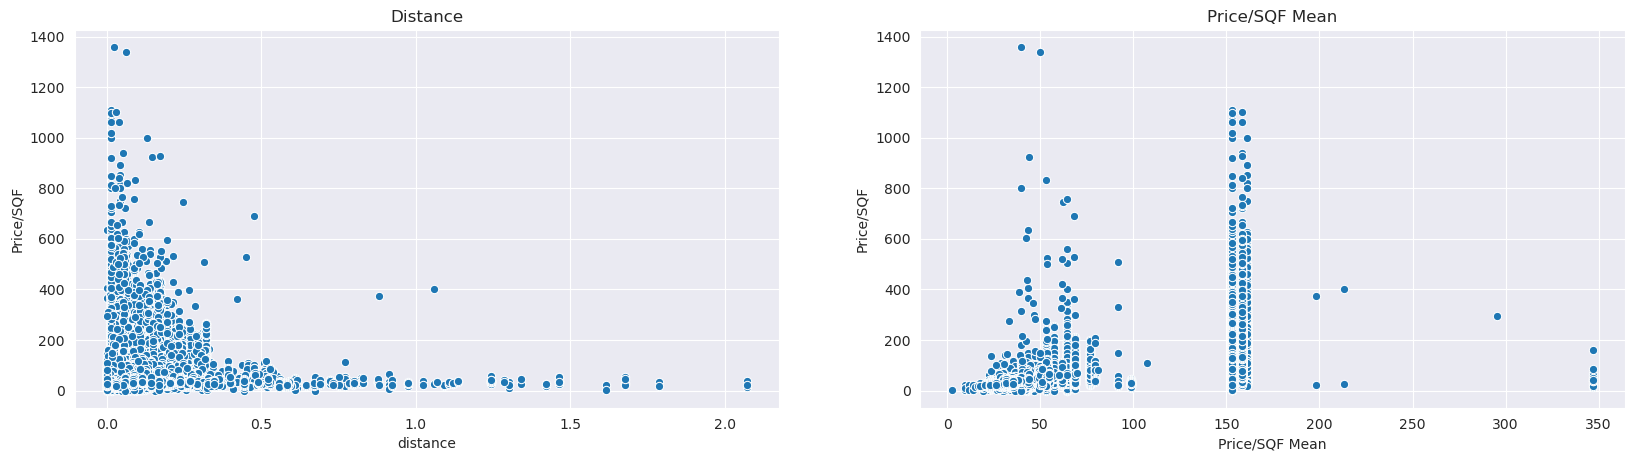

In [76]:
fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
df = city_df_with_dist[city_df_with_dist['Price/SQF'] < 1500] # remove outlier
df = df.merge(long_lat_center_df, on='City', how='inner')
df = df[df['Price/SQF Mean'] < 1500] 
sns.scatterplot(x=df['distance'], y=df['Price/SQF'], ax=ax[0])
sns.scatterplot(x=df['Price/SQF Mean'], y=df['Price/SQF'], ax=ax[1])
ax[0].set_title('Distance')
ax[1].set_title('Price/SQF Mean')

## Final Features to use

### Now we can start train the model, here I'm using XGBBoosting Regressor with hyper param tuning
### Here are feature being used
* POSTED_BY_CODE
* UNDER_CONSTRUCTION
* RERA
* BHK_NO.
* RESALE
* distance
* SQUARE_FT 
* Price/SQF Mean'

### Target
* TARGET(PRICE_IN_LACS)

In [418]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_CODE,Price/SQF,City,Street,count,IS_COOR_INDIA,LONG_MODE,LAT_MODE,distance,C_LONG,C_LAT,Price/SQF Mean
0,Dealer,0,0,4,BHK,2750.929368,1,1,"Sikandra,Agra",27.216013,77.950834,74.0,2,26.90,Agra,Sikandra,83,1,27.216013,77.950834,0.081582,27.170656,78.018644,33.174
1,Owner,0,1,2,BHK,1250.000000,1,1,"Shastripuram,Agra",27.216013,77.950834,32.0,1,25.60,Agra,Shastripuram,83,1,27.216013,77.950834,0.081582,27.170656,78.018644,33.174
2,Owner,0,0,2,BHK,1200.087279,1,1,"Khandari,Agra",27.204996,77.990474,55.0,1,45.83,Agra,Khandari,83,1,27.216013,77.950834,0.044417,27.170656,78.018644,33.174
3,Dealer,0,0,2,BHK,1237.381960,1,1,"Shastripuram,Agra",27.216013,77.950834,38.0,2,30.71,Agra,Shastripuram,83,1,27.216013,77.950834,0.081582,27.170656,78.018644,33.174
4,Owner,0,1,3,BHK,1550.387597,1,1,"Taj Nagari,Agra",27.180000,78.020000,48.0,1,30.96,Agra,Taj Nagari,83,1,27.216013,77.950834,0.009442,27.170656,78.018644,33.174


In [196]:
required_columns = [
    'POSTED_BY_CODE', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'RESALE', 
    'distance', 'SQUARE_FT', 'Price/SQF Mean', 'TARGET(PRICE_IN_LACS)'
]

# Create the new DataFrame with only the required columns
df_new = df[required_columns]

In [197]:
df_new.head()

,POSTED_BY_CODE,UNDER_CONSTRUCTION,RERA,BHK_NO.,RESALE,distance,SQUARE_FT,Price/SQF Mean,TARGET(PRICE_IN_LACS)
0,2,0,0,4,1,0.081582,2750.929368,33.174,74.0
1,1,0,1,2,1,0.081582,1250.000000,33.174,32.0
2,1,0,0,2,1,0.044417,1200.087279,33.174,55.0
3,2,0,0,2,1,0.081582,1237.381960,33.174,38.0
4,1,0,1,3,1,0.009442,1550.387597,33.174,48.0


In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.exceptions import NotFittedError

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

sns.set_style('darkgrid')

%matplotlib inline

In [199]:
df_new.columns

Index(['POSTED_BY_CODE', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'RESALE',
       'distance', 'SQUARE_FT', 'Price/SQF Mean', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [200]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')

ms,ss=MinMaxScaler(),StandardScaler()


ct=ColumnTransformer([
    ('cat_encoder',oh,make_column_selector(dtype_include='object')),
    ('num_encoder',ms,make_column_selector(dtype_include='float64'))
],remainder='passthrough',n_jobs=-1)

In [253]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the scaler
scaler = StandardScaler()  # or MinMaxScaler() for Min-Max Scaling

# Define the columns to be scaled
columns_to_scale = ['POSTED_BY_CODE', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'RESALE', 'distance', 'SQUARE_FT', 'Price/SQF Mean', 'TARGET(PRICE_IN_LACS)']

# Fit the scaler to the data and transform the columns
df_new_scaled = df_new.copy()  # Create a copy of the DataFrame to avoid modifying the original
df_new_scaled[columns_to_scale] = scaler.fit_transform(df_new_scaled[columns_to_scale])

# Now df_new_scaled contains the scaled features

In [289]:
X = df_new[['POSTED_BY_CODE', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'RESALE', 'distance', 'SQUARE_FT', 'Price/SQF Mean']]
y = df_new[['TARGET(PRICE_IN_LACS)']]

In [290]:
X.head()

,POSTED_BY_CODE,UNDER_CONSTRUCTION,RERA,BHK_NO.,RESALE,distance,SQUARE_FT,Price/SQF Mean
0,2,0,0,4,1,0.081582,2750.929368,33.174
1,1,0,1,2,1,0.081582,1250.000000,33.174
2,1,0,0,2,1,0.044417,1200.087279,33.174
3,2,0,0,2,1,0.081582,1237.381960,33.174
4,1,0,1,3,1,0.009442,1550.387597,33.174


In [291]:
y.head()

,TARGET(PRICE_IN_LACS)
0,74.0
1,32.0
2,55.0
3,38.0
4,48.0


In [292]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=108)

In [293]:
X_train.shape,y_train.shape

((23355, 8), (23355, 1))

In [294]:
X_train.head()

,POSTED_BY_CODE,UNDER_CONSTRUCTION,RERA,BHK_NO.,RESALE,distance,SQUARE_FT,Price/SQF Mean
26942,1,0,0,3,1,0.161247,1520.045601,39.836881
21137,2,0,0,2,1,0.279409,1020.110755,158.239660
25385,1,0,0,3,1,0.020648,1472.885517,68.835647
2862,2,0,1,3,1,0.061473,2044.006252,64.126840
5774,2,0,1,3,1,0.030759,1885.014138,53.309440


In [295]:
X_test.shape,y_test.shape

((5839, 8), (5839, 1))

In [296]:
X_test.head(2)

,POSTED_BY_CODE,UNDER_CONSTRUCTION,RERA,BHK_NO.,RESALE,distance,SQUARE_FT,Price/SQF Mean
14246,2,0,0,3,1,0.012953,1474.080747,152.867745
2156,1,0,0,2,1,0.097415,1355.013550,64.126840


In [297]:
y_test.head(2)

,TARGET(PRICE_IN_LACS)
14246,180.0
2156,120.0


In [298]:
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [299]:
X_test

array([[6.25043968e-03, 5.75174602e-06, 4.36358667e-01, ...,
        0.00000000e+00, 3.00000000e+00, 1.00000000e+00],
       [4.70056600e-02, 5.28398201e-06, 1.78460268e-01, ...,
        0.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [1.49217904e-01, 2.20028003e-06, 1.92144982e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [6.25043968e-03, 3.19793466e-06, 4.36358667e-01, ...,
        1.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [4.04412378e-02, 5.94423100e-06, 2.79749367e-01, ...,
        1.00000000e+00, 2.00000000e+00, 0.00000000e+00],
       [4.17408855e-02, 2.50622503e-06, 1.78460268e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [300]:
tup1=None;tup2=None
try:
    tup1=(X_test[0].toarray(),y_test.head(1).values)  # scientific notation
    print("Sparse Matrix to Dense Array")
except:
    tup2=(X_test[0],y_test.head(1).values) 
    print("Normal Matrix to Dense Array")

tup1 if(tup1) else tup2

Normal Matrix to Dense Array


(array([6.25043968e-03, 5.75174602e-06, 4.36358667e-01, 2.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.00000000e+00, 1.00000000e+00]),
 array([[180.]]))

In [301]:
X_train.shape,y_train.shape

((23355, 8), (23355, 1))

In [302]:
X_test.shape,y_test.shape

((5839, 8), (5839, 1))

In [404]:
X_test[0]

array([6.25043968e-03, 5.75174602e-06, 4.36358667e-01, 2.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.00000000e+00, 1.00000000e+00])

In [303]:
y_test.head()

,TARGET(PRICE_IN_LACS)
14246,180.0
2156,120.0
24948,24.0
9373,75.0
11203,29.0


In [414]:
X_test[3]

array([6.85715031e-15, 5.89391744e-06, 1.18896433e-01, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.00000000e+00, 1.00000000e+00])

In [305]:
def print_model_locations(model_list):
    print("-"*80)
    for i,model in enumerate(model_list):
        print(model)
        print(f"{model.__class__.__name__:50} at index {i}")
        print("-"*80)

In [306]:
def model_fitter(model_list):
    print("-"*80)
    for reg in model_list:
        reg_name=reg.__class__.__name__
        reg.fit(X_train,y_train.values.ravel())
        print(f"Fitting {reg_name} done")
        print("-"*80)

## Loading the models

In [307]:
from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

In [308]:
reg_list=[
    DecisionTreeRegressor(),
    LinearRegression(n_jobs=-1),
    RandomForestRegressor(n_estimators=200,n_jobs=-1),
    AdaBoostRegressor(n_estimators=200,learning_rate=0.1),
    XGBRegressor(n_estimators=200,learning_rate=0.1,n_jobs=-1),
    LGBMRegressor(n_estimators=200,learning_rate=0.1,n_jobs=-1),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.1),
]

In [309]:
reg_list_copy=[
    DecisionTreeRegressor(),
    LinearRegression(n_jobs=1),
    RandomForestRegressor(n_estimators=200,n_jobs=-1),
    AdaBoostRegressor(n_estimators=200,learning_rate=0.1),
    XGBRegressor(n_estimators=200,learning_rate=0.1,tree_method='gpu_hist',n_jobs=-1),
    LGBMRegressor(n_estimators=200,learning_rate=0.1,device='gpu',n_jobs=-1),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.1),
]

In [310]:
print_model_locations(reg_list)

--------------------------------------------------------------------------------
DecisionTreeRegressor()
DecisionTreeRegressor                              at index 0
--------------------------------------------------------------------------------
LinearRegression(n_jobs=-1)
LinearRegression                                   at index 1
--------------------------------------------------------------------------------
RandomForestRegressor(n_estimators=200, n_jobs=-1)
RandomForestRegressor                              at index 2
--------------------------------------------------------------------------------
AdaBoostRegressor(learning_rate=0.1, n_estimators=200)
AdaBoostRegressor                                  at index 3
--------------------------------------------------------------------------------
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', 

In [311]:
%%time
model_fitter(reg_list)

--------------------------------------------------------------------------------
Fitting DecisionTreeRegressor done
--------------------------------------------------------------------------------
Fitting LinearRegression done
--------------------------------------------------------------------------------
Fitting RandomForestRegressor done
--------------------------------------------------------------------------------
Fitting AdaBoostRegressor done
--------------------------------------------------------------------------------
Fitting XGBRegressor done
--------------------------------------------------------------------------------
Fitting LGBMRegressor done
--------------------------------------------------------------------------------
Fitting GradientBoostingRegressor done
--------------------------------------------------------------------------------
CPU times: user 28.8 s, sys: 169 ms, total: 29 s
Wall time: 15.3 s


In [312]:
def tester_func(model_list):
    for i,reg in enumerate(model_list):
        
        reg_name = reg.__class__.__name__
        pred=None
        
        try:
            pred=reg.predict(X_test)
        except NotFittedError as e:
            raise(e)
            
        print("-"*80)
        print(f"Predicitng {reg_name:40} done")

        score_dict[reg_name]={
            "R2 Score":r2_score(y_test,pred),
            "Root Mean Squared Error": mean_squared_error(y_test,pred, squared=False),
            "Mean Absolute Error Score":mean_absolute_error(y_test,pred),
            "Mean Squared Error Score":mean_squared_error(y_test,pred),
            'model_index':int(i)
        }
        j=i
    
    print("-"*80)
    
    return j

In [313]:
score_dict={};j=0

In [314]:
j_copy=tester_func(reg_list)

--------------------------------------------------------------------------------
Predicitng DecisionTreeRegressor                    done
--------------------------------------------------------------------------------
Predicitng LinearRegression                         done
--------------------------------------------------------------------------------
Predicitng RandomForestRegressor                    done
--------------------------------------------------------------------------------
Predicitng AdaBoostRegressor                        done
--------------------------------------------------------------------------------
Predicitng XGBRegressor                             done
--------------------------------------------------------------------------------
Predicitng LGBMRegressor                            done
--------------------------------------------------------------------------------
Predicitng GradientBoostingRegressor                done
----------------------------------

In [315]:
j_copy

6

## Scores of each model

In [316]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('Root Mean Squared Error')
score_pd

,R2 Score,Root Mean Squared Error,Mean Absolute Error Score,Mean Squared Error Score,model_index
RandomForestRegressor,0.927226,163.658072,36.298686,26783.964519,2.0
GradientBoostingRegressor,0.922836,168.521430,46.992228,28399.472275,6.0
XGBRegressor,0.915444,176.409385,38.820254,31120.271287,4.0
DecisionTreeRegressor,0.904990,186.996285,41.340345,34967.610447,0.0
LGBMRegressor,0.883167,207.362852,44.698337,42999.352440,5.0
AdaBoostRegressor,0.881279,209.031461,91.028421,43694.151617,3.0
LinearRegression,0.087213,579.606451,139.248862,335943.637929,1.0


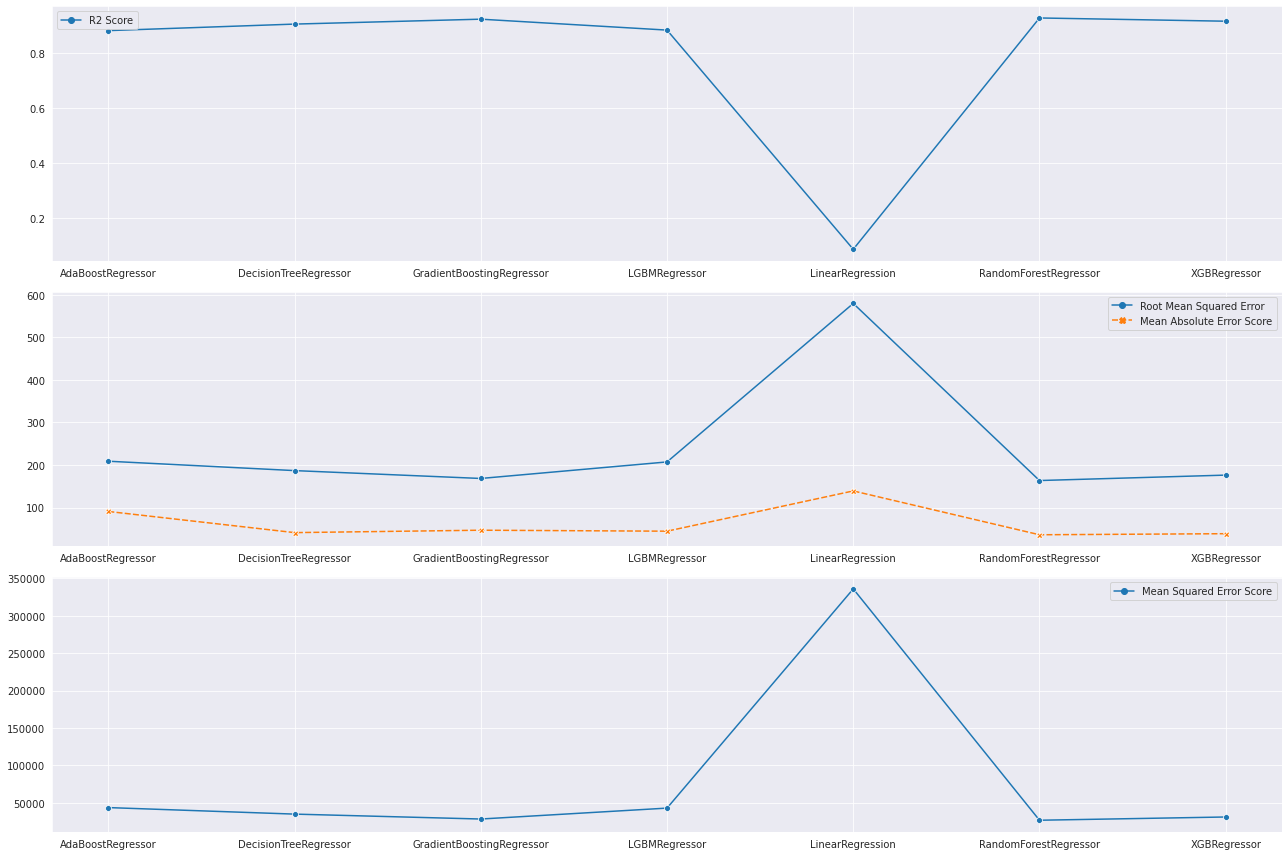

In [317]:
fig,ax=plt.subplots(3,1,figsize=(18,12))
sns.lineplot(data=score_pd.iloc[:,[1,2]],markers=True,ax=ax[1])
sns.lineplot(data=score_pd.iloc[:,[0]],markers=True,ax=ax[0])
sns.lineplot(data=score_pd.iloc[:,[3]],markers=True,ax=ax[2])
plt.tight_layout()
plt.show()

# Best Model Plot

In [318]:
score_pd.iloc[[0],:]

,R2 Score,Root Mean Squared Error,Mean Absolute Error Score,Mean Squared Error Score,model_index
RandomForestRegressor,0.927226,163.658072,36.298686,26783.964519,2.0


In [319]:
win_index=int(score_pd.iloc[0,-1])
win_index

2

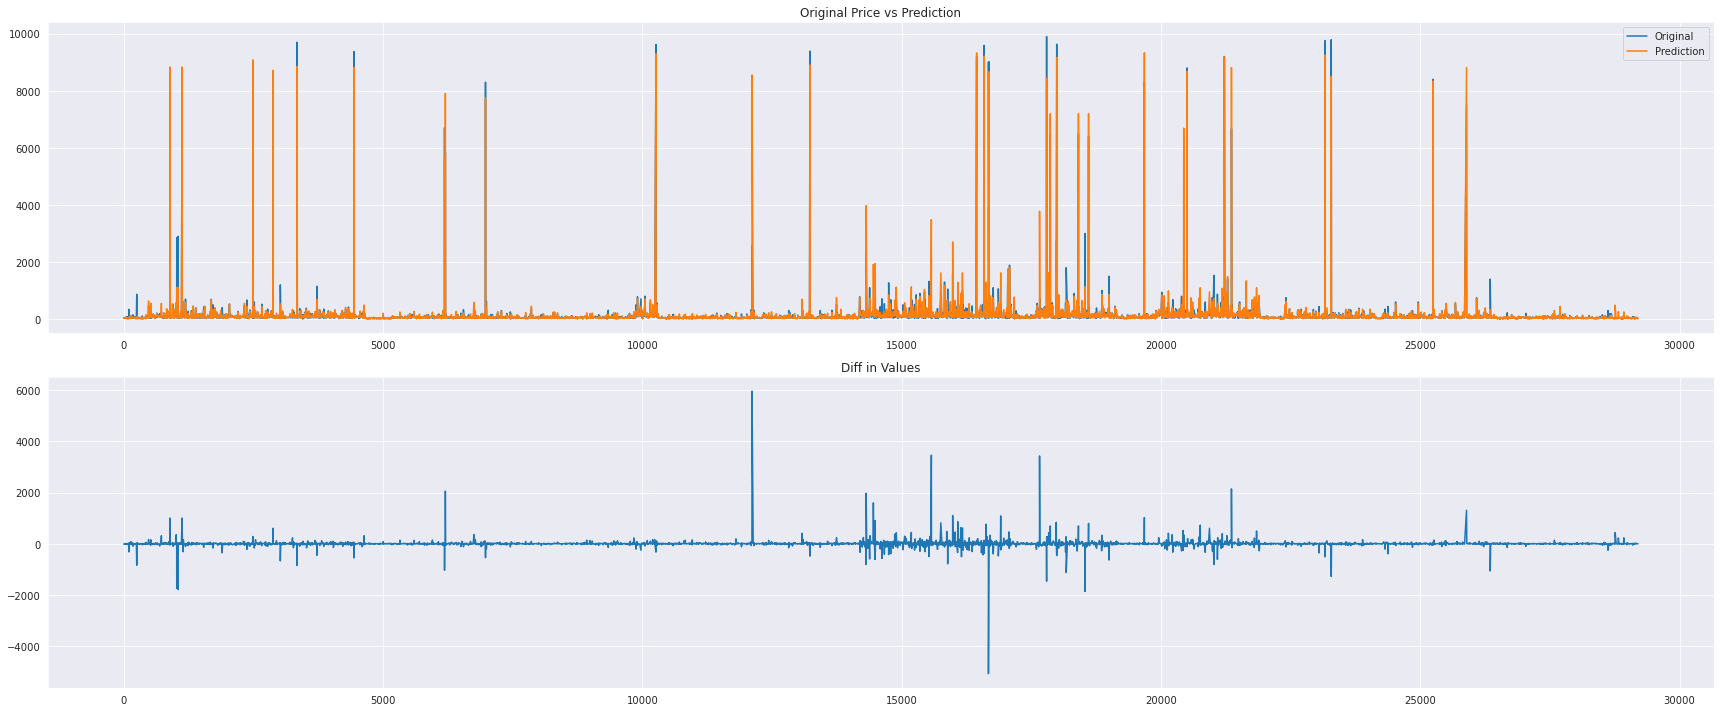

In [320]:
# Generating predictions and differences
pred = reg_list[win_index].predict(X_test)
diff = pred - y_test.values.ravel()

# Creating subplots
fig, ax = plt.subplots(2, 1, figsize=(24, 10))

# Plot original prices and predictions
sns.lineplot(y=y_test.values.ravel(), x=y_test.index, legend=False, ax=ax[0])
sns.lineplot(y=pred, x=y_test.index, legend=False, ax=ax[0])

# Plot differences
sns.lineplot(y=diff, x=y_test.index, legend="full", ax=ax[1])

# Set titles
ax[0].set_title('Original Price vs Prediction')
ax[0].legend(['Original', 'Prediction'])
ax[1].set_title('Diff in Values')

# Adjust y-axis limits
# ax[0].set_ylim(0, 30000)
# ax[1].set_ylim(-15000, 15000)  # Assuming you want the diff plot to also be centered

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Hyperparameter tuning

In [322]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [387]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    #'bootstrap' : [True, False]
}

In [393]:
gs=GridSearchCV(estimator=reg_list_copy[win_index],param_grid=param_grid,verbose=3,cv=3,n_jobs=-1)
gs

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [394]:
reg_list.append(gs)

In [391]:
if gs in reg_list:
    reg_list.remove(gs)

In [395]:
print_model_locations(reg_list)

--------------------------------------------------------------------------------
DecisionTreeRegressor()
DecisionTreeRegressor                              at index 0
--------------------------------------------------------------------------------
LinearRegression(n_jobs=-1)
LinearRegression                                   at index 1
--------------------------------------------------------------------------------
RandomForestRegressor(n_estimators=200, n_jobs=-1)
RandomForestRegressor                              at index 2
--------------------------------------------------------------------------------
AdaBoostRegressor(learning_rate=0.1, n_estimators=200)
AdaBoostRegressor                                  at index 3
--------------------------------------------------------------------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction

In [396]:
#%%time
gs.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.4min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [397]:
gs.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [398]:
score_dict={}
tester_func(reg_list)

--------------------------------------------------------------------------------
Predicitng DecisionTreeRegressor                    done
--------------------------------------------------------------------------------
Predicitng LinearRegression                         done
--------------------------------------------------------------------------------
Predicitng RandomForestRegressor                    done
--------------------------------------------------------------------------------
Predicitng AdaBoostRegressor                        done
--------------------------------------------------------------------------------
Predicitng XGBRegressor                             done
--------------------------------------------------------------------------------
Predicitng LGBMRegressor                            done
--------------------------------------------------------------------------------
Predicitng GradientBoostingRegressor                done
----------------------------------

9

In [399]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('Root Mean Squared Error')
score_pd

,R2 Score,Root Mean Squared Error,Mean Absolute Error Score,Mean Squared Error Score,model_index
GridSearchCV,0.931567,158.701195,42.545888,25186.069327,9.0
RandomForestRegressor,0.927226,163.658072,36.298686,26783.964519,2.0
GradientBoostingRegressor,0.922836,168.521430,46.992228,28399.472275,6.0
XGBRegressor,0.915444,176.409385,38.820254,31120.271287,4.0
DecisionTreeRegressor,0.904990,186.996285,41.340345,34967.610447,0.0
LGBMRegressor,0.883167,207.362852,44.698337,42999.352440,5.0
AdaBoostRegressor,0.881279,209.031461,91.028421,43694.151617,3.0
LinearRegression,0.087213,579.606451,139.248862,335943.637929,1.0


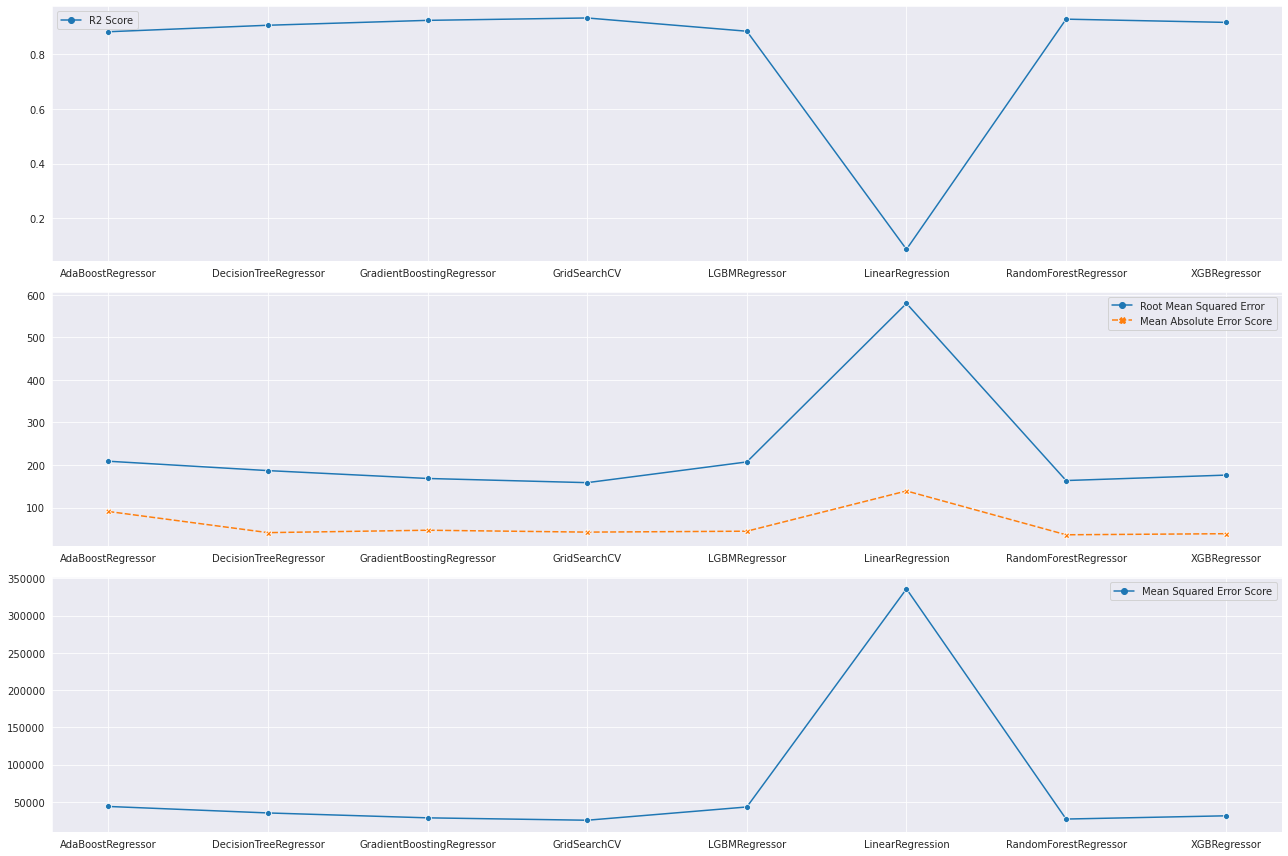

In [400]:
fig,ax=plt.subplots(3,1,figsize=(18,12))
sns.lineplot(data=score_pd.iloc[:,[1,2]],markers=True,ax=ax[1])
sns.lineplot(data=score_pd.iloc[:,[0]],markers=True,ax=ax[0])
sns.lineplot(data=score_pd.iloc[:,[3]],markers=True,ax=ax[2])
plt.tight_layout()
plt.show()

In [401]:
score_pd.iloc[[0],:]

,R2 Score,Root Mean Squared Error,Mean Absolute Error Score,Mean Squared Error Score,model_index
GridSearchCV,0.931567,158.701195,42.545888,25186.069327,9.0


In [402]:
win_index=int(score_pd.iloc[0,-1])
win_index

9

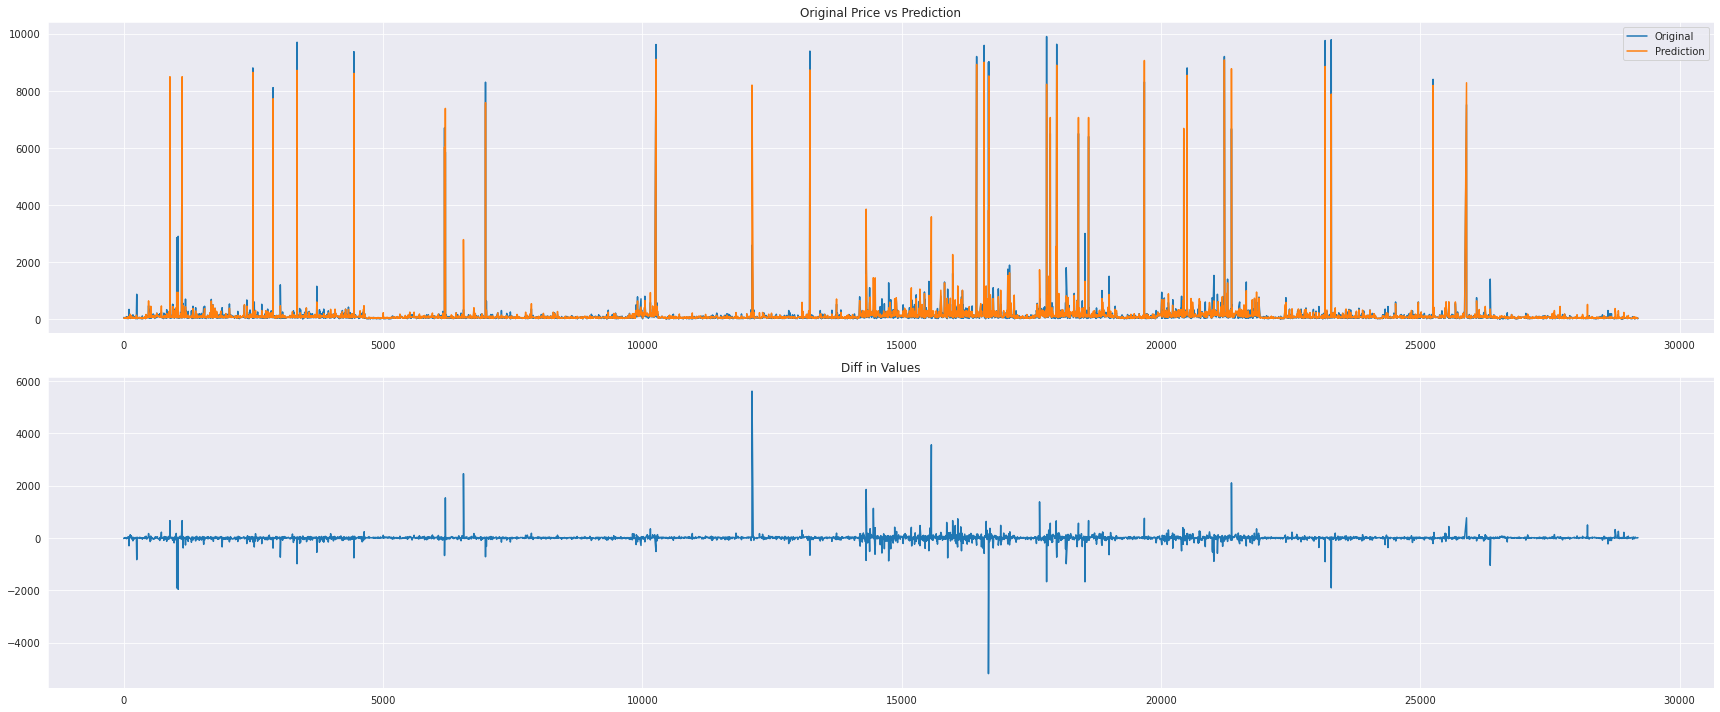

In [403]:
pred = reg_list[win_index].predict(X_test)
diff = pred - y_test.values.ravel()

fig, ax = plt.subplots(2, 1, figsize=(24, 10))

# Ploting the graph btw original prices and predictions
sns.lineplot(y=y_test.values.ravel(), x=y_test.index, legend=False, ax=ax[0])
sns.lineplot(y=pred, x=y_test.index, legend=False, ax=ax[0])

# Ploting differences
sns.lineplot(y=diff, x=y_test.index, legend="full", ax=ax[1])

# Set titles
ax[0].set_title('Original Price vs Prediction')
ax[0].legend(['Original', 'Prediction'])
ax[1].set_title('Diff in Values')

# Adjust y-axis limits
# ax[0].set_ylim(0, 30000)
# ax[1].set_ylim(-15000, 15000)  # Assuming you want the diff plot to also be centered

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [415]:
sample_input = np.array([[6.85715031e-15, 5.89391744e-06, 1.18896433e-01, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.00000000e+00, 1.00000000e+00]])

In [416]:
prediction = reg_list[win_index].predict(sample_input)

In [417]:
prediction

array([65.22742302])

# Custom implementations of algos

In [133]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# # Initialize the scaler
# scaler = StandardScaler()  # or MinMaxScaler() for Min-Max Scaling

# # Define the columns to be scaled
# columns_to_scale = ['POSTED_BY_CODE', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'RESALE', 'distance', 'SQUARE_FT', 'Price/SQF Mean', 'TARGET(PRICE_IN_LACS)']

# # Fit the scaler to the data and transform the columns
# df_new_scaled = df_new.copy()  # Create a copy of the DataFrame to avoid modifying the original
# df_new_scaled[columns_to_scale] = scaler.fit_transform(df_new_scaled[columns_to_scale])

# # Now df_new_scaled contains the scaled features

In [134]:
# target_column = 'TARGET(PRICE_IN_LACS)'

# # Split the DataFrame into features and target
# X = df_new_scaled.drop(target_column, axis=1)  # Features
# y = df_new_scaled[target_column]              # Target

# # If you want to print the first few rows to verify
# print("Features (first 5 rows):")
# print(X.head())
# print("\nTarget (first 5 rows):")
# print(y.head())

Features (first 5 rows):
   POSTED_BY_CODE  UNDER_CONSTRUCTION      RERA   BHK_NO.    RESALE  distance  \
0        0.651235           -0.469558 -0.685612  1.986008  0.275895 -0.109794   
1       -1.290762           -0.469558  1.458551 -0.468152  0.275895 -0.109794   
2       -1.290762           -0.469558 -0.685612 -0.468152  0.275895 -0.431764   
3        0.651235           -0.469558 -0.685612 -0.468152  0.275895 -0.109794   
4       -1.290762           -0.469558  1.458551  0.758928  0.275895 -0.734758   

   SQUARE_FT  Price/SQF Mean  
0  -0.009014       -0.902457  
1  -0.009800       -0.902457  
2  -0.009826       -0.902457  
3  -0.009807       -0.902457  
4  -0.009643       -0.902457  

Target (first 5 rows):
0   -0.104737
1   -0.168467
2   -0.133567
3   -0.159363
4   -0.144189
Name: TARGET(PRICE_IN_LACS), dtype: float64


In [135]:
# df_new.head()

,POSTED_BY_CODE,UNDER_CONSTRUCTION,RERA,BHK_NO.,RESALE,distance,SQUARE_FT,Price/SQF Mean,TARGET(PRICE_IN_LACS)
0,2,0,0,4,1,0.081582,2750.929368,33.174,74.0
1,1,0,1,2,1,0.081582,1250.000000,33.174,32.0
2,1,0,0,2,1,0.044417,1200.087279,33.174,55.0
3,2,0,0,2,1,0.081582,1237.381960,33.174,38.0
4,1,0,1,3,1,0.009442,1550.387597,33.174,48.0


In [136]:
# X = np.array(df_new_scaled[['POSTED_BY_CODE', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'RESALE', 'distance', 'SQUARE_FT', 'Price/SQF Mean']])
# y = np.array(df_new_scaled['TARGET(PRICE_IN_LACS)'])

In [137]:
# X,y

(array([[ 0.65123472, -0.46955825, -0.6856121 , ..., -0.10979374,
         -0.00901393, -0.90245731],
        [-1.29076185, -0.46955825,  1.45855069, ..., -0.10979374,
         -0.0097999 , -0.90245731],
        [-1.29076185, -0.46955825, -0.6856121 , ..., -0.43176442,
         -0.00982604, -0.90245731],
        ...,
        [-1.29076185, -0.46955825, -0.6856121 , ..., -0.81655861,
         -0.00995114, -1.03516861],
        [-1.29076185, -0.46955825, -0.6856121 , ...,  5.52943601,
         -0.01000934, -1.05738107],
        [-1.29076185, -0.46955825, -0.6856121 , ...,  5.52943601,
         -0.01003814, -1.05738107]]),
 array([-0.10473679, -0.16846718, -0.13356721, ..., -0.17757152,
        -0.17908891, -0.18971064]))

In [138]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # Assuming X is your input data array and y is your target data array

# # Step 1: Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 2: Train the model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Step 3: Make predictions
# y_pred = model.predict(X_test)

# # Step 4: Calculate accuracy
# mse = mean_squared_error(y_test, y_pred)
# print(mse)
# accuracy = 1 - (mse / y_test.var())
# print("Accuracy (R-squared):", accuracy)

0.7821247233558842
Accuracy (R-squared): 0.404564490998213


In [139]:
# from sklearn.svm import SVR, LinearSVR
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor

# # Initialize models
# models = {
#     'SVR': SVR(),
#     'SVR-L2': LinearSVR(loss='squared_epsilon_insensitive', dual=False),
#     'Ridge': Ridge(),
#     'Lasso': Lasso(),
#     'Decision Tree': DecisionTreeRegressor(),
#     'Random Forest': RandomForestRegressor()
# }

# # Train and evaluate each model
# for name, model in models.items():
#     # Fit the model
#     model.fit(X_train, y_train)
#     # Make predictions
#     y_pred = model.predict(X_test)
#     R2_Score = r2_score(y_test, pred)
#     print("R2 Score:", R2_Score)

#     RMSE = mean_squared_error(y_test, pred, squared=False)
#     print("Root Mean Squared Error:", RMSE)

#     MAE = mean_absolute_error(y_test, pred)
#     print("Mean Absolute Error:", MAE)

#     MSE = mean_squared_error(y_test, pred)
#     print("Mean Squared Error:", MSE)
#     # Calculate R-squared
#     r_squared = model.score(X_test, y_test)
#     print(f"{name} R-squared: {r_squared}")

R2 Score: -304723.63974610396
Root Mean Squared Error: 632.6659015197896
Mean Absolute Error: 147.2576338153515
Mean Squared Error: 400266.14294584806
R2 Score: -304723.63974610396
Root Mean Squared Error: 632.6659015197896
Mean Absolute Error: 147.2576338153515
Mean Squared Error: 400266.14294584806
R2 Score: -304723.63974610396
Root Mean Squared Error: 632.6659015197896
Mean Absolute Error: 147.2576338153515
Mean Squared Error: 400266.14294584806
R2 Score: -304723.63974610396
Root Mean Squared Error: 632.6659015197896
Mean Absolute Error: 147.2576338153515
Mean Squared Error: 400266.14294584806
R2 Score: -304723.63974610396
Root Mean Squared Error: 632.6659015197896
Mean Absolute Error: 147.2576338153515
Mean Squared Error: 400266.14294584806
R2 Score: -304723.63974610396
Root Mean Squared Error: 632.6659015197896
Mean Absolute Error: 147.2576338153515
Mean Squared Error: 400266.14294584806


In [35]:
# class LinearRegression:
#     def __init__(self):
#         pass
#         #W = np.random.randn(0 + 1) * 0.01
        

#     def forward(self, X, y, W):
#         """
#         Parameters:
#         X (array) : Independent Features
#         y (array) : Dependent Features/ Target Variable
#         W (array) : Weights 

#         Returns:
#         loss (float) : Calculated Mean Squared Error Loss for y and y_pred
#         y_pred (array) : Predicted Target Variable
#         """
#         y_pred = np.dot(X, W)
#         loss = np.mean((y_pred - y) ** 2) / 2
#         return loss, y_pred

#     def updateWeights(self, X, y_pred, y_true, W, alpha):
#         """
#         Parameters:
#         X (array) : Independent Features
#         y_pred (array) : Predicted Target Variable
#         y_true (array) : Dependent Features/ Target Variable
#         W (array) : Weights
#         alpha (float) : Learning rate

#         Returns:
#         W (array) : Updated Weights
#         """
#         gradient = np.dot(X.T, (y_pred - y_true)) / len(y_true)
#         W -= alpha * gradient
#         return W

#     def train(self, X, y, epochs=10, alpha=0.00001, initial_weights=None):
#         """
#         Parameters:
#         X (array) : Independent Feature
#         y (array) : Dependent Features/ Target Variable
#         epochs (int) : Number of epochs for training, default value is 10
#         alpha (float) : Learning rate, default value is 0.001

#         Returns:
#         W (array) : Trained Weights
#         train_loss (list) : Calculated Mean Squared Error Loss for y and y_pred during training
#         """
#         num_cols = X.shape[1]  # Number of Columns 
#         if initial_weights is not None:
#             assert initial_weights.shape == (num_cols,), "Invalid shape for initial_weights"
#             W = initial_weights
#         else:
#             W = np.random.randn(num_cols) / np.sqrt(num_cols)       # Weight Initialization
        
#         # Calculating Loss and Updating Weights
#         train_loss = []
#         for epoch in range(epochs+1):
#             loss, y_pred = self.forward(X, y, W)
#             train_loss.append(loss)
#             W = self.updateWeights(X, y_pred, y, W, alpha)
#             if epoch%100 == 0:
#                 print("Epoch {}, Loss: {}".format(epoch, loss))
            
#         return W, train_loss

#     def predict(self, W_trained, X_sample):
#         prediction = np.dot(X_sample, W_trained)
#         return prediction

#     def plotLoss(self, loss):
#         """
#         Parameters:
#         loss (list) : Calculated Mean Squared Error Loss for y and y_pred during training

#         Returns: None
#         Plots a graph of Loss vs Epochs
#         """
#         plt.plot(loss)
#         plt.xlabel('Epochs')
#         plt.ylabel('Loss')
#         plt.title('Training Loss')
#         plt.show()

In [36]:
# # Initialize linear regression model
# model = LinearRegression()

In [37]:
# # Train the model
# trained_weights, train_loss = model.train(X_train, y_train, epochs=1000, alpha=0.01)

Epoch 0, Loss: 0.9710093936310681
Epoch 100, Loss: 0.5131071920436914
Epoch 200, Loss: 0.41621774944949336
Epoch 300, Loss: 0.39395208782045316
Epoch 400, Loss: 0.38844775354178945
Epoch 500, Loss: 0.3870049630729554
Epoch 600, Loss: 0.3866098106449181
Epoch 700, Loss: 0.38649808131250113
Epoch 800, Loss: 0.38646574846896903
Epoch 900, Loss: 0.38645622720161116
Epoch 1000, Loss: 0.38645338427694453


In [38]:
# l_y_pred = model.predict(trained_weights, X_test)

In [39]:
# mse = mean_squared_error(y_test, l_y_pred)
# print(mse)

0.7822466884344252


Epoch 0, Loss: 0.5643544603642421
Epoch 100, Loss: 0.5605142500010235
Epoch 200, Loss: 0.5567844490381776
Epoch 300, Loss: 0.5531612498780781
Epoch 400, Loss: 0.5496409890586891
Epoch 500, Loss: 0.5462201415479095
Epoch 600, Loss: 0.5428953152686969
Epoch 700, Loss: 0.5396632458455317
Epoch 800, Loss: 0.53652079156318
Epoch 900, Loss: 0.5334649285290787
Epoch 1000, Loss: 0.5304927460310269
Epoch 0, Loss: 0.732916563062201
Epoch 100, Loss: 0.6667855647376407
Epoch 200, Loss: 0.6151283662541104
Epoch 300, Loss: 0.5743252718947136
Epoch 400, Loss: 0.541770966954697
Epoch 500, Loss: 0.5155655170850911
Epoch 600, Loss: 0.49430468817640566
Epoch 700, Loss: 0.4769366382186947
Epoch 800, Loss: 0.46266315687102905
Epoch 900, Loss: 0.45087096105715735
Epoch 1000, Loss: 0.44108339472875707
Epoch 0, Loss: 0.8832658570980673
Epoch 100, Loss: 0.45020578521193544
Epoch 200, Loss: 0.39850638460126764
Epoch 300, Loss: 0.38908575075647717
Epoch 400, Loss: 0.38708301458804567
Epoch 500, Loss: 0.386613431

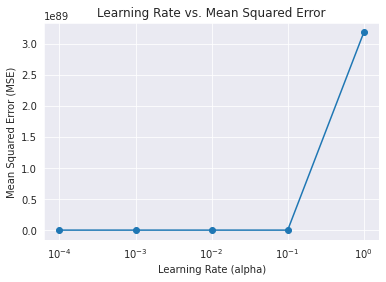

In [40]:
# mse_values = []
# alpha_values = []

# # Define a range of alpha values to test
# alpha_range = [0.0001, 0.001, 0.01, 0.1, 1]

# # Train models for each alpha value
# for alpha in alpha_range:
#     # Initialize and train RidgeRegression model
#     linear_model = LinearRegression()
#     # Train the model
#     trained_weights, train_loss = linear_model.train(X_train, y_train, epochs=1000, alpha=alpha)
    
#     # Predict on test data
#     y_pred = linear_model.predict(trained_weights, X_test)
    
#     # Calculate MSE and store it
#     mse = np.mean((y_pred - y_test) ** 2)
#     mse_values.append(mse)
    
#     # Store the alpha value
#     alpha_values.append(alpha)

# # Plot alpha vs. MSE
# plt.plot(alpha_values, mse_values, marker='o')
# plt.xscale('log')  # Use log scale for alpha values
# plt.xlabel('Learning Rate (alpha)')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.title('Learning Rate vs. Mean Squared Error')
# plt.grid(True)
# plt.show()

In [37]:
# class RidgeRegression:
#     def __init__(self, alpha=0.1):
#         self.alpha = alpha
#         self.W = None

#     def forward(self, X, y, W):
#         y_pred = np.dot(X, W)
#         loss = np.mean((y_pred - y) ** 2) / 2 + self.alpha * np.sum(W ** 2) / 2
#         return loss, y_pred

#     def updateWeights(self, X, y_pred, y_true, W, alpha):
#         gradient = np.dot(X.T, (y_pred - y_true)) / len(y_true) + alpha * W
#         W -= alpha * gradient
#         return W

#     def train(self, X, y, epochs=100, alpha=0.00001, initial_weights=None):
#         num_cols = X.shape[1]
#         if initial_weights is not None:
#             assert initial_weights.shape == (num_cols,), "Invalid shape for initial_weights"
#             W = initial_weights
#         else:
#             W = np.random.randn(num_cols) / np.sqrt(num_cols)
        
#         train_loss = []
#         for epoch in range(epochs+1):
#             loss, y_pred = self.forward(X, y, W)
#             train_loss.append(loss)
#             W = self.updateWeights(X, y_pred, y, W, alpha)
#             if epoch % 100 == 0:
#                 print("Epoch {}, Loss: {}".format(epoch, loss))
        
#         return W, train_loss

#     def predict(self, W_trained, X_sample):
#         prediction = np.dot(X_sample, W_trained)
#         return prediction

#     def plotLoss(self, loss):
#         plt.plot(loss)
#         plt.xlabel('Epochs')
#         plt.ylabel('Loss')
#         plt.title('Training Loss')
#         plt.show()

In [38]:
# # Initialize and train Ridge Regression model
# ridge_reg = RidgeRegression()
# trained_weights_ridge, train_loss_ridge = ridge_reg.train(X_train, y_train, epochs=1000, alpha=0.01)
# li_r_y_pred = ridge_reg.predict(trained_weights_ridge, X_test)
# li_r_mse = mean_squared_error(y_test, li_r_y_pred)
# print(li_r_mse)

Epoch 0, Loss: 1.2207033924501969
Epoch 100, Loss: 0.4935637659563081
Epoch 200, Loss: 0.4176486216680713
Epoch 300, Loss: 0.40093118957310037
Epoch 400, Loss: 0.3965247715423237
Epoch 500, Loss: 0.3953716700113811
Epoch 600, Loss: 0.39513575277386714
Epoch 700, Loss: 0.3951444635379814
Epoch 800, Loss: 0.39520125111260673
Epoch 900, Loss: 0.3952534505597647
Epoch 1000, Loss: 0.3952912552203352
0.7853701986455424


Epoch 0, Loss: 0.5598157945891009
Epoch 100, Loss: 0.5563354392140836
Epoch 200, Loss: 0.5529386056922564
Epoch 300, Loss: 0.54962285686765
Epoch 400, Loss: 0.54638583871268
Epoch 500, Loss: 0.5432252772078157
Epoch 600, Loss: 0.5401389753443716
Epoch 700, Loss: 0.5371248102454379
Epoch 800, Loss: 0.534180730400181
Epoch 900, Loss: 0.5313047530069341
Epoch 1000, Loss: 0.5284949614206887
Epoch 0, Loss: 0.7263402095686872
Epoch 100, Loss: 0.6699373189084508
Epoch 200, Loss: 0.6236232785009072
Epoch 300, Loss: 0.5854337264748462
Epoch 400, Loss: 0.5538266738416281
Epoch 500, Loss: 0.5275811533831755
Epoch 600, Loss: 0.5057229334622443
Epoch 700, Loss: 0.48746939399588984
Epoch 800, Loss: 0.47218812363560575
Epoch 900, Loss: 0.45936545918415267
Epoch 1000, Loss: 0.44858231699540224
Epoch 0, Loss: 0.7751062267755617
Epoch 100, Loss: 0.451131846185289
Epoch 200, Loss: 0.40029064923988106
Epoch 300, Loss: 0.39040144361578555
Epoch 400, Loss: 0.38814798979412785
Epoch 500, Loss: 0.387574944372

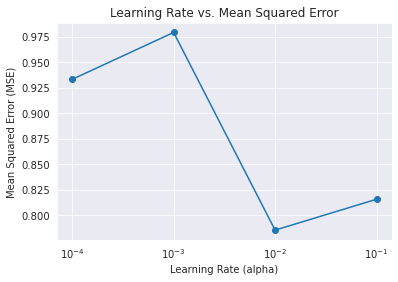

In [39]:
# import matplotlib.pyplot as plt

# # Initialize lists to store MSE values and learning rates
# mse_values = []
# alpha_values = []

# # Define a range of alpha values to test
# alpha_range = [0.0001, 0.001, 0.01, 0.1, 1]

# # Train models for each alpha value
# for alpha in alpha_range:
#     # Initialize and train RidgeRegression model
#     ridge_model = RidgeRegression(alpha=alpha)
#     # Train the model
#     trained_weights, train_loss = ridge_model.train(X_train, y_train, epochs=1000, alpha=alpha)
    
#     # Predict on test data
#     y_pred = ridge_model.predict(trained_weights, X_test)
    
#     # Calculate MSE and store it
#     mse = np.mean((y_pred - y_test) ** 2)
#     mse_values.append(mse)
    
#     # Store the alpha value
#     alpha_values.append(alpha)

# # Plot alpha vs. MSE
# plt.plot(alpha_values, mse_values, marker='o')
# plt.xscale('log')  # Use log scale for alpha values
# plt.xlabel('Learning Rate (alpha)')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.title('Learning Rate vs. Mean Squared Error')
# plt.grid(True)
# plt.show()

In [40]:
# class LassoRegression:
#     def __init__(self, alpha=0.01):
#         self.alpha = alpha
#         self.W = None

#     def forward(self, X, y, W):
#         y_pred = np.dot(X, W)
#         loss = np.mean((y_pred - y) ** 2) / 2 + self.alpha * np.sum(np.abs(W))
#         return loss, y_pred

#     def updateWeights(self, X, y_pred, y_true, W, alpha):
#         gradient = np.dot(X.T, (y_pred - y_true)) / len(y_true) + alpha * np.sign(W)
#         W -= alpha * gradient
#         return W

#     def train(self, X, y, epochs=10, alpha=0.00001, initial_weights=None):
#         num_cols = X.shape[1]
#         if initial_weights is not None:
#             assert initial_weights.shape == (num_cols,), "Invalid shape for initial_weights"
#             W = initial_weights
#         else:
#             W = np.random.randn(num_cols) / np.sqrt(num_cols)
        
#         train_loss = []
#         for epoch in range(epochs+1):
#             loss, y_pred = self.forward(X, y, W)
#             train_loss.append(loss)
#             W = self.updateWeights(X, y_pred, y, W, alpha)
#             if epoch % 100 == 0:
#                 print("Epoch {}, Loss: {}".format(epoch, loss))
        
#         return W, train_loss

#     def predict(self, W_trained, X_sample):
#         prediction = np.dot(X_sample, W_trained)
#         return prediction

#     def plotLoss(self, loss):
#         plt.plot(loss)
#         plt.xlabel('Epochs')
#         plt.ylabel('Loss')
#         plt.title('Training Loss')
#         plt.show()

In [41]:
# # Initialize and train Lasso Regression model
# lasso_reg = LassoRegression()
# trained_weights_lasso, train_loss_lasso = lasso_reg.train(X_train, y_train, epochs=1000, alpha=0.01)
# li_l_y_pred = ridge_reg.predict(trained_weights_lasso, X_test)
# li_l_mse = mean_squared_error(y_test, li_l_y_pred)
# print(li_l_mse)

Epoch 0, Loss: 0.9169405068107773
Epoch 100, Loss: 0.4513720973004382
Epoch 200, Loss: 0.4034696363785599
Epoch 300, Loss: 0.3957916523538854
Epoch 400, Loss: 0.3947355489060889
Epoch 500, Loss: 0.3945174384917514
Epoch 600, Loss: 0.3944641513229705
Epoch 700, Loss: 0.3944490534529724
Epoch 800, Loss: 0.3944450007871094
Epoch 900, Loss: 0.3944434244641834
Epoch 1000, Loss: 0.39444276136445905
0.7931003932606402


Epoch 0, Loss: 1.7538097691207426
Epoch 100, Loss: 0.5471758693939377
Epoch 200, Loss: 0.4207124147514902
Epoch 300, Loss: 0.3956542117677815
Epoch 400, Loss: 0.3892026480680582
Epoch 500, Loss: 0.38764830188252725
Epoch 600, Loss: 0.3873471455105214
Epoch 700, Loss: 0.38721113217360265
Epoch 800, Loss: 0.38714191731182207
Epoch 900, Loss: 0.38710445685630585
Epoch 1000, Loss: 0.38708351073514446
Epoch 0, Loss: 0.5841249946952172
Epoch 100, Loss: 0.4258490997431849
Epoch 200, Loss: 0.39542980743596096
Epoch 300, Loss: 0.3890041266651965
Epoch 400, Loss: 0.38774199057429737
Epoch 500, Loss: 0.3875777925696648
Epoch 600, Loss: 0.38759628969176674
Epoch 700, Loss: 0.38763619015013556
Epoch 800, Loss: 0.3876688219469743
Epoch 900, Loss: 0.387690540877492
Epoch 1000, Loss: 0.38770423802602855
Epoch 0, Loss: 0.5612509495342477
Epoch 100, Loss: 0.4190806586312924
Epoch 200, Loss: 0.398628662853958
Epoch 300, Loss: 0.3949603602093192
Epoch 400, Loss: 0.3945122978834173
Epoch 500, Loss: 0.39446

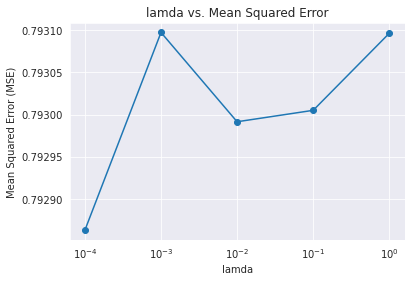

In [42]:
# import matplotlib.pyplot as plt

# # Initialize lists to store MSE values and learning rates
# mse_values = []
# alpha_values = []

# # Define a range of alpha values to test
# alpha_range = [0.0001, 0.001, 0.01, 0.1, 1]

# # Train models for each alpha value
# for alpha in alpha_range:
#     # Initialize and train RidgeRegression model
#     lasso_model = LassoRegression(alpha=alpha)
#     # Train the model
#     trained_weights, train_loss = lasso_model.train(X_train, y_train, epochs=1000, alpha=0.01)
    
#     # Predict on test data
#     y_pred = lasso_model.predict(trained_weights, X_test)
    
#     # Calculate MSE and store it
#     mse = np.mean((y_pred - y_test) ** 2)
#     mse_values.append(mse)
    
#     # Store the alpha value
#     alpha_values.append(alpha)

# # Plot alpha vs. MSE
# plt.plot(alpha_values, mse_values, marker='o')
# plt.xscale('log')  # Use log scale for alpha values
# plt.xlabel('lamda')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.title('lamda vs. Mean Squared Error')
# plt.grid(True)
# plt.show()


In [48]:
# class SVR:
#     def __init__(self, epsilon=0.5):
#         self.epsilon = epsilon
#         self.W = None
#         self.intercept_ = None

#     def _compute_loss(self, X, y):
#         y_pred = np.dot(X, self.W) + self.intercept_
#         error = np.maximum(0, np.abs(y_pred - y) - self.epsilon)
#         loss = np.linalg.norm(self.W) / 2 + np.mean(error)
#         return loss

#     def fit(self, X, y, epochs=100, learning_rate=1):
#         feature_len = X.shape[-1] if len(X.shape) > 1 else 1

#         #if len(X.shape) == 1:
#          #   X = X.reshape(-1, 1)
#         #if len(y.shape) == 1:
#          #   y = y.values.reshape(-1, 1)

#         self.W = np.random.randn(feature_len)
#         self.intercept_ = np.random.randn(1)

#         for epoch in range(epochs):

#             # Compute gradients
#             y_pred = np.dot(X, self.W) + self.intercept_
#             error = y_pred - y
            
#             grad_W = np.dot(X.T, np.where(np.abs(error) > self.epsilon, np.sign(error), 0))
#             grad_b = np.sum(np.where(np.abs(error) > self.epsilon, np.sign(error), 0))
#             # Update weights
#             self.W = self.W - learning_rate * grad_W / len(y)
#             self.intercept_ -= learning_rate * grad_b / len(y)
            
#             loss = self._compute_loss(X, y)
#             if epoch%100 == 0:
#                 print("{}/{}: loss: {}".format(epoch, epochs, loss))
            
#         return self

#     def predict(self, X):
#         if len(X.shape) == 1:
#             X = X.reshape(-1, 1)
#         y_pred = np.dot(X, self.W) + self.intercept_
#         return y_pred

In [49]:
# model1 = SVR()

In [50]:
# model1.fit(X_train, y_train, epochs=1000, learning_rate = 1)

0/1000: loss: 2.670470292021279
100/1000: loss: 0.27896461656257865
200/1000: loss: 0.18474343574972046
300/1000: loss: 0.23283738804613838
400/1000: loss: 0.23324202334735483
500/1000: loss: 0.23367358057640109
600/1000: loss: 0.23410087151449926
700/1000: loss: 0.23454095557525811
800/1000: loss: 0.23231057441420921
900/1000: loss: 0.23276711585730547


In [51]:
# svr_y_pred = model1.predict(X_test)
# svr_mse = mean_squared_error(y_test, svr_y_pred)
# print(svr_mse)

0.8753170474445191


0/1000: loss: 1.5397119219188284
100/1000: loss: 1.5314205535355958
200/1000: loss: 1.5231383884256637
300/1000: loss: 1.5148664991195195
400/1000: loss: 1.5066028484100313
500/1000: loss: 1.498350536861213
600/1000: loss: 1.4901097662211913
700/1000: loss: 1.4818776842841364
800/1000: loss: 1.4736568610129317
900/1000: loss: 1.465446637634427
0/1000: loss: 1.9708867452930214
100/1000: loss: 1.834701985348853
200/1000: loss: 1.7005745195300515
300/1000: loss: 1.5687458438063224
400/1000: loss: 1.4408098286756996
500/1000: loss: 1.3173534710406916
600/1000: loss: 1.2003984824526837
700/1000: loss: 1.0927753025019933
800/1000: loss: 1.0006699698586707
900/1000: loss: 0.9259566051563272
0/1000: loss: 3.9079271096893935
100/1000: loss: 2.4747205787537085
200/1000: loss: 1.3023229225315798
300/1000: loss: 0.5513432050094096
400/1000: loss: 0.2840488741686244
500/1000: loss: 0.2425534636305351
600/1000: loss: 0.23118955130750268
700/1000: loss: 0.2266787725835498
800/1000: loss: 0.2243696973

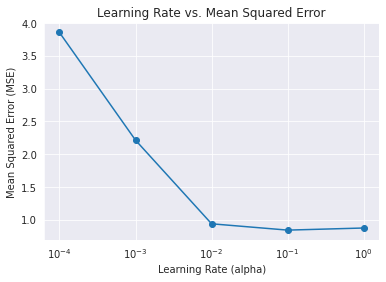

In [52]:
# # Initialize lists to store MSE values and learning rates
# mse_values = []
# alpha_values = []

# # Define a range of alpha values to test
# alpha_range = [0.0001, 0.001, 0.01, 0.1, 1]

# # Train models for each alpha value
# for alpha in alpha_range:
#     model1 = SVR()
#     # Initialize and train RidgeRegression model
#     model1.fit(X_train, y_train, epochs=1000, learning_rate = alpha)
    
#     y_pred = model1.predict(X_test)
#     # Calculate MSE and store it
#     mse = np.mean((y_pred - y_test) ** 2)
#     mse_values.append(mse)
    
#     # Store the alpha value
#     alpha_values.append(alpha)

# # Plot alpha vs. MSE
# plt.plot(alpha_values, mse_values, marker='o')
# plt.xscale('log')  # Use log scale for alpha values
# plt.xlabel('Learning Rate (alpha)')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.title('Learning Rate vs. Mean Squared Error')
# plt.grid(True)
# plt.show()

In [53]:
# class SVR_L2:
#     def __init__(self, epsilon=0.5, alpha=0.01):
#         self.epsilon = epsilon
#         self.alpha = alpha  # L2 regularization parameter
#         self.W = None
#         self.intercept_ = None

#     def _compute_loss(self, X, y):
#         y_pred = np.dot(X, self.W) + self.intercept_
#         error = np.maximum(0, np.abs(y_pred - y) - self.epsilon)
#         loss = np.linalg.norm(self.W) / 2 + np.mean(error) + self.alpha * np.sum(self.W ** 2) / 2
#         return loss

#     def fit(self, X, y, X_val=None, y_val=None, epochs=100, learning_rate=0.1, tol=1e-6, verbose=True):
#         feature_len = X.shape[-1] if len(X.shape) > 1 else 1

#         self.W = np.random.randn(feature_len)
#         self.intercept_ = np.random.randn(1)
#         prev_loss = np.inf

#         for epoch in range(epochs):
#             loss = self._compute_loss(X, y)

#             # Compute gradients
#             y_pred = np.dot(X, self.W) + self.intercept_
#             error = y_pred - y
#             grad_W = np.dot(X.T, np.where(np.abs(error) > self.epsilon, np.sign(error), 0)) + self.alpha * self.W
#             grad_b = np.sum(np.where(np.abs(error) > self.epsilon, np.sign(error), 0))
            
#             # Update weights
#             self.W = self.W - learning_rate * grad_W / len(y)
#             self.intercept_ -= learning_rate * grad_b / len(y)

#             if verbose and (epoch+1) % 100 == 0:
#                 print("{}/{}: loss: {}".format(epoch+1, epochs, loss))
            
#             # Check for convergence
#             if abs(loss - prev_loss) < tol:
#                 if verbose:
#                     print("Converged at epoch", epoch+1)
#                 break
#             prev_loss = loss

#         return self

#     def predict(self, X):
#         if len(X.shape) == 1:
#             X = X.reshape(-1, 1)
#         y_pred = np.dot(X, self.W) + self.intercept_
#         return y_pred


In [54]:
# model2 = SVR_L2()

In [55]:
# # Train the model
# model2.fit(X_train, y_train, epochs=1500, learning_rate=1)

100/1500: loss: 0.1926690690634838
Converged at epoch 197


In [56]:
# svr_l2_y_pred = model1.predict(X_test)
# svr_l2_mse = mean_squared_error(y_test, svr_l2_y_pred)
# print(svr_l2_mse)

0.874444903918937


100/1000: loss: 3.33057226587252
200/1000: loss: 3.316248079491475
300/1000: loss: 3.301941936614886
400/1000: loss: 3.2876540649941908
500/1000: loss: 3.2733836958488856
600/1000: loss: 3.2591294372595585
700/1000: loss: 3.244890416535578
800/1000: loss: 3.2306659666102213
900/1000: loss: 3.21645819977824
1000/1000: loss: 3.2022696992312847
100/1000: loss: 4.0390242604132185
200/1000: loss: 3.954928681878461
300/1000: loss: 3.8717241142843
400/1000: loss: 3.7894698065722165
500/1000: loss: 3.7080770162979246
600/1000: loss: 3.6274927507773875
700/1000: loss: 3.5475420475695825
800/1000: loss: 3.4680532761692144
900/1000: loss: 3.3889898081638687
1000/1000: loss: 3.3102735760725963
100/1000: loss: 3.922244540325057
200/1000: loss: 2.625017770251864
300/1000: loss: 1.4992543639952391
400/1000: loss: 0.6826684508116599
500/1000: loss: 0.35562169580496183
600/1000: loss: 0.35237235121364624
700/1000: loss: 0.34930823151722434
800/1000: loss: 0.3462455807441453
900/1000: loss: 0.3431844705

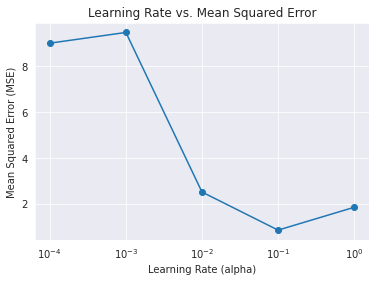

In [57]:
# # Initialize lists to store MSE values and learning rates
# mse_values = []
# alpha_values = []

# # Define a range of alpha values to test
# alpha_range = [0.0001, 0.001, 0.01, 0.1, 1]

# # Train models for each alpha value
# for alpha in alpha_range:
#     model1 = SVR_L2(0.01)
#     # Initialize and train RidgeRegression model
#     model1.fit(X_train, y_train, epochs=1000, learning_rate = alpha)
    
#     y_pred = model1.predict(X_test)
#     # Calculate MSE and store it
#     mse = np.mean((y_pred - y_test) ** 2)
#     mse_values.append(mse)
    
#     # Store the alpha value
#     alpha_values.append(alpha)

# # Plot alpha vs. MSE
# plt.plot(alpha_values, mse_values, marker='o')
# plt.xscale('log')  # Use log scale for alpha values
# plt.xlabel('Learning Rate (alpha)')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.title('Learning Rate vs. Mean Squared Error')
# plt.grid(True)
# plt.show()

In [58]:
# import pandas as pd
# import numpy as np
# import math

# class DecisionTreeRegressor:
#     def __init__(self, x, y, min_leaf=1, max_depth=None):
#         self.x = x
#         self.y = y
#         self.min_leaf = min_leaf
#         self.max_depth = max_depth
#         self.row_count = x.shape[0]
#         self.idxs = np.array(range(self.row_count))
#         self.category_count = x.shape[1]
#         self.val = np.mean(y.values[self.idxs])
#         self.score = float('inf')
#         self.depth = 0

#         self.left_decision_tree = None
#         self.right_decision_tree = None
#         self.splitting_category_id = None
#         self.split_val = None

#         self.find_split_category()

#     def find_split_category(self):
#         if self.max_depth is not None and self.depth >= self.max_depth:
#             return
        
#         for i in range(self.category_count):
#             self.check_category_for_split(i)

#         if self.is_leaf:
#             return

#         x = self.split_col

#         lhs = np.nonzero(x <= self.split_val)[0]
#         rhs = np.nonzero(x > self.split_val)[0]

#         self.left_decision_tree = DecisionTreeRegressor(
#             self.x.iloc[lhs], self.y.iloc[lhs], self.min_leaf, self.max_depth)
#         self.right_decision_tree = DecisionTreeRegressor(
#             self.x.iloc[rhs], self.y.iloc[rhs], self.min_leaf, self.max_depth)
#         self.left_decision_tree.depth = self.depth + 1
#         self.right_decision_tree.depth = self.depth + 1

#     def check_category_for_split(self, category_id):
#         x = self.x.values[self.idxs, category_id]
#         y = self.y.values[self.idxs]

#         sorted_idx = np.argsort(x)
#         sorted_x = x[sorted_idx]
#         sorted_y = y[sorted_idx]

#         # Standard deviation criterion specific
#         # TODO: Refactor code and create other criteria

#         rhs_count = self.row_count
#         rhs_sum = sorted_y.sum()
#         rhs_square_sum = (sorted_y ** 2).sum()

#         lhs_count = 0
#         lhs_sum = 0.0
#         lhs_square_sum = 0.0

#         for i in range(0, self.row_count - self.min_leaf):
#             x_i = sorted_x[i]
#             y_i = sorted_y[i]

#             lhs_count += 1
#             rhs_count -= 1

#             lhs_sum += y_i
#             rhs_sum -= y_i

#             lhs_square_sum += y_i ** 2
#             rhs_square_sum -= y_i ** 2

#             if i < self.min_leaf - 1 or x_i == sorted_x[i + 1]:
#                 continue

#             lhs_std = self.std_deviation_score(
#                 lhs_count, lhs_sum, lhs_square_sum)
#             rhs_std = self.std_deviation_score(
#                 rhs_count, rhs_sum, rhs_square_sum)
#             curr_score = lhs_std * lhs_count + rhs_std * rhs_count

#             if curr_score < self.score:
#                 self.splitting_category_id = category_id
#                 self.score = curr_score
#                 self.split_val = x_i

#     def std_deviation_score(self, count, sum_val, square_sum):
#         return math.sqrt(max(0, (square_sum / count) - (sum_val / count) ** 2))

#     @property
#     def split_name(self):
#         return self.x.columns[self.splitting_category_id]

#     @property
#     def split_col(self):
#         return self.x.values[self.idxs, self.splitting_category_id]

#     @property
#     def is_leaf(self):
#         return self.score == float('inf')

#     def predict(self, x):
#         rows = [self.predict_row(x_i[1]) for x_i in x.iterrows()]
#         return np.array(rows)

#     def predict_row(self, x_i):
#         if self.is_leaf:
#             return self.val

#         if x_i[self.splitting_category_id] <= self.split_val:
#             return self.left_decision_tree.predict_row(x_i)
#         else:
#             return self.right_decision_tree.predict_row(x_i)

In [59]:
# target_column = 'TARGET(PRICE_IN_LACS)'

# # Split the DataFrame into features and target
# XX = df_new_scaled.drop(target_column, axis=1)  # Features
# yy = df_new_scaled[target_column]              # Target

# # If you want to print the first few rows to verify
# print("Features (first 5 rows):")
# print(XX.head())
# print("\nTarget (first 5 rows):")
# print(yy.head())

Features (first 5 rows):
   POSTED_BY_CODE  UNDER_CONSTRUCTION      RERA   BHK_NO.    RESALE  distance  \
0        0.651235           -0.469558 -0.685612  1.986008  0.275895 -0.109794   
1       -1.290762           -0.469558  1.458551 -0.468152  0.275895 -0.109794   
2       -1.290762           -0.469558 -0.685612 -0.468152  0.275895 -0.431764   
3        0.651235           -0.469558 -0.685612 -0.468152  0.275895 -0.109794   
4       -1.290762           -0.469558  1.458551  0.758928  0.275895 -0.734758   

   SQUARE_FT  Price/SQF Mean  
0  -0.009014       -0.902457  
1  -0.009800       -0.902457  
2  -0.009826       -0.902457  
3  -0.009807       -0.902457  
4  -0.009643       -0.902457  

Target (first 5 rows):
0   -0.104737
1   -0.168467
2   -0.133567
3   -0.159363
4   -0.144189
Name: TARGET(PRICE_IN_LACS), dtype: float64


In [60]:
# from sklearn.model_selection import train_test_split

# # Assuming XX is your DataFrame and yy is your target variable
# XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

In [61]:
# tree = DecisionTreeRegressor(XX_train, yy_train, min_leaf=5, max_depth=10)

In [62]:
# yy_pred = tree.predict(XX_test)

In [63]:
# d_mse = mean_squared_error(yy_test, yy_pred)
# print(d_mse)

0.4623556651620119


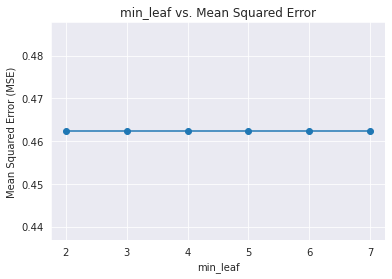

In [64]:
# min_leaf_values = range(2, 8)

# # Initialize lists to store MSE values and models
# mse_values = []
# models = []

# # Train models for each min_leaf value
# for min_leaf in min_leaf_values:
#     # Initialize and train DecisionTreeRegressor model
#     tree = DecisionTreeRegressor(XX_train, yy_train, min_leaf=min_leaf, max_depth=5)    
#     # Predict on training data
#     y_pred = tree.predict(XX_test)
    
#     # Calculate MSE and store it
#     mse = mean_squared_error(yy_test, yy_pred)
#     mse_values.append(mse)
    
#     # Store the trained model along with its MSE value
#     models.append((tree, mse))

# # Plot min_leaf vs. MSE
# plt.plot(min_leaf_values, mse_values, marker='o')
# plt.xlabel('min_leaf')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.title('min_leaf vs. Mean Squared Error')
# plt.grid(True)
# plt.show()

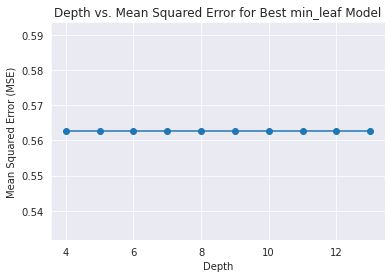

In [65]:
# best_model_index = np.argmin(mse_values)
# best_model, min_mse = models[best_model_index]
# depth_values = range(4, 14)

# # Initialize lists to store MSE values for different depths
# mse_depth_values = []

# # Train models with varying depths for the best min_leaf value
# for depth in depth_values:
#     # Initialize and train DecisionTreeRegressor model
#     tree_depth = DecisionTreeRegressor(XX_train, yy_train, min_leaf=10, max_depth=depth)
    
#     # Predict on training data
#     y_pred_depth = tree_depth.predict(XX_test)
    
#     # Calculate MSE and store it
#     mse_depth = mean_squared_error(yy_test, y_pred_depth)
#     mse_depth_values.append(mse_depth)

# # Plot depth vs. MSE for the best min_leaf model
# plt.plot(depth_values, mse_depth_values, marker='o')
# plt.xlabel('Depth')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.title('Depth vs. Mean Squared Error for Best min_leaf Model')
# plt.grid(True)
# plt.show()